# Complete data analysis pipeline

## General table of contents:
* [Visualisation of PANAS](#panas)
* [Brainnetome partial atlas](#brainnet) 
* [Connectome extraction](#extract)
* [Constructing dataframe](#csv)
* [Principal component analysis](#pca)
* [Post-analysis](#post)

<hr>

<a name="panas"/>

# Visualisation of PANAS

## Table of contents:
* [Setting up](#setting)
* [Creating a dataframe from questionnaire answers](#panas-df) 
* [Graphs and vizualisation of panas PA/NA](#visu) 
* [Descriptive statistics](#descr)

<a name="setting"/>

## Setting up

In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import nilearn
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

<a name="panas-df"/>

## Creating a dataframe from answers to the mood questionnaire PANAS

In [2]:
# Selecting workspace
os.chdir('') # Add path to the document containing questionnaire answers

In [3]:
# The data is in dictionnary form in json
import json

In [4]:
extension = 'txt'
all_pheno_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [5]:
# Making a list of every subject's dictionnary and adding subject number
dico_list_pheno = []
for subject_number, name in enumerate(all_pheno_filenames, start=1):
    with open(name) as f:
        subject_data = json.load(f)
        subject_data['subject'] = subject_number
        dico_list_pheno.append(subject_data)

In [6]:
# Putting all the subject's data in one dataframe
pheno_df = pd.concat([pd.DataFrame(f) for f in dico_list_pheno], axis=0)

In [7]:
pheno_df.keys()

Index(['scanDate', 'daysFromFirstScan', 'scanTime', 'minTemp_C', 'maxTemp_C',
       'wind_km_h', 'precip_mm', 'precip_form', 'sunshine_hrs', 'atmPressume',
       'relHumidity', 'MR_Room_Temperature', 'MR_Room_Humidity',
       'MR_HeliumLevel', 'sleptDuringScan', 'ruminationDuringScan',
       'anxietyDuringScan', 'menstrualCycleDay', 'caffein_last24hs_cups',
       'caffein_last2hs_cups', 'sweets_last24hs_Likert',
       'chocolate_last24hs_gramms', 'chocolate_last2hs_gramms',
       'cacao_last24hs_percentage', 'cacao_last2hs_percentage',
       'alcohol_last24hs_drinks', 'cigarettes_last24hs',
       'marihuanaCigarettes_last24hs', 'liquid_last24hs_liters', 'weight_kg',
       'bloodPressure_systolic_mmHg', 'bloodPressure_diastolic_mmHg',
       'estradiol', 'testosterone', 'physicalPainDuringScan',
       'generalHealth_last24hs', 'generalStress_last24hs',
       'easeOfConcentration_last24hs', 'hoursOfWork_last24hs',
       'hoursFree_last24hs', 'hoursSport_last24hs',
       'ho

In [8]:
# Creating the PANAS_PA (positive affect) and PANAS_NA (negative affect), wich is the sum of their respective categories
pheno_df['PANAS_PA'] = pheno_df[['PANAS_active','PANAS_interested', 'PANAS_excited','PANAS_strong','PANAS_inspired', 
                     'PANAS_proud','PANAS_enthusiastic','PANAS_alert','PANAS_determined', 'PANAS_attentive']].sum(axis=1)

pheno_df['PANAS_NA'] = pheno_df[['PANAS_distressed', 'PANAS_upset','PANAS_guilty', 'PANAS_scared', 'PANAS_hostile',
       'PANAS_irritable','PANAS_ashamed','PANAS_nervous','PANAS_jittery', 'PANAS_afraid']].sum(axis=1)

In [9]:
# Selecting the data from PANAS
cols = ['subject', 'daysFromFirstScan', 'PANAS_PA', 'PANAS_NA']

panas_df = pheno_df.loc[:,cols]

In [10]:
# Removing the two subjects with insufficient data (2 and 4)
panas_df = panas_df[panas_df.subject !=2]
panas_df = panas_df[panas_df.subject !=4]

# Re-setting index correctly and adding column for the session number
panas_df.reset_index(names="session_num", inplace=True)
panas_df

,session_num,subject,daysFromFirstScan,PANAS_PA,PANAS_NA
0,0,1,0,24,12
1,1,1,2,23,16
2,2,1,7,20,17
3,3,1,9,27,16
4,4,1,14,26,12
...,...,...,...,...,...
276,44,8,220,30,11
277,45,8,222,23,12
278,46,8,224,22,25
279,47,8,226,28,14


In [11]:
# Re-setting directory to this file's location
os.chdir(sys.path[0])

In [12]:
# Exporting csv
panas_df.to_csv("output_data/panas_df.csv", index=False)

<a name="visu"/>

## Visualizations of PANAS PA and NA

In [13]:
# Enables text editing in svg files for matplotlib
# From : https://stackoverflow.com/questions/50345077/how-do-i-save-the-text-in-python-plots-editable-in-svg-files

new_rc_params = {'text.usetex': False,"svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)

In [14]:
# White background for seaborn
sns.set_style(rc={'axes.facecolor': 'white'})

In [15]:
panas_df = pd.read_csv("output_data/panas_df.csv")

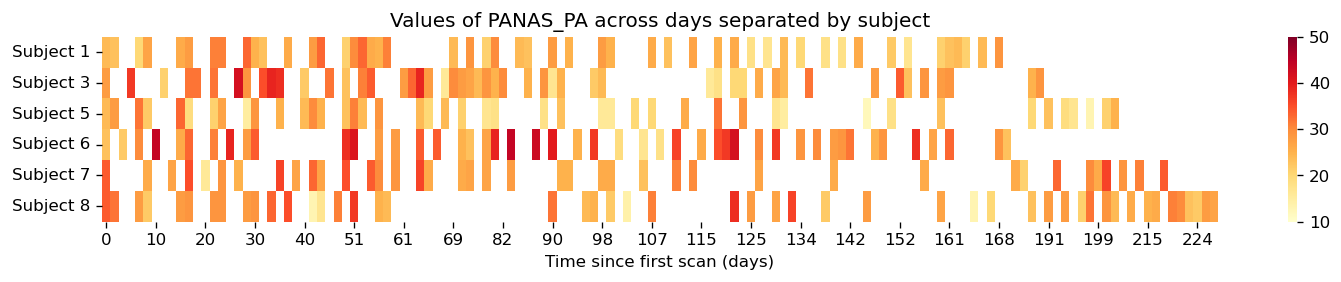

In [16]:
# Heatmaps of affect in the 6 retained subject for each session
plt.figure(figsize=(15,2), dpi=120)
plt.subplots_adjust(hspace=0.8)

subs = ["Subject 1", "Subject 3", "Subject 5", "Subject 6", "Subject 7", "Subject 8"]

plt.title('Values of PANAS_PA across days separated by subject')  
df_temp = panas_df.pivot_table(index='daysFromFirstScan', columns='subject', values='PANAS_PA', aggfunc='mean')
s=sns.heatmap(df_temp.T, cmap="YlOrRd", vmin = 10, vmax = 50, yticklabels=subs)
s.set_xlabel("Time since first scan (days)")
s.set_ylabel("")
plt.xticks(rotation=0)
plt.locator_params(axis='x', nbins=30)




plt.savefig("output_figures/heatmap_PANAS_PA_vs_days.svg", bbox_inches='tight')

plt.show()

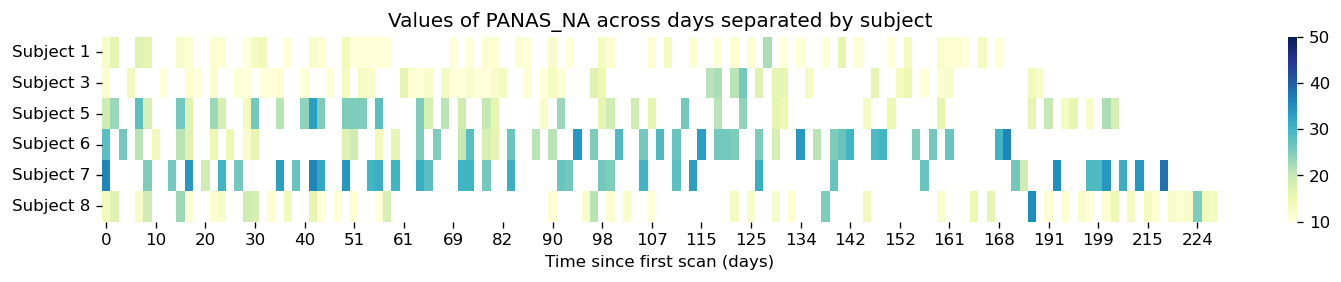

In [17]:
# Heatmaps of negative affect across sessions
plt.figure(figsize=(15,2), dpi=120)


plt.title('Values of PANAS_NA across days separated by subject')  
df_temp = panas_df.pivot_table(index='daysFromFirstScan', columns='subject', values='PANAS_NA', aggfunc='mean')
s = sns.heatmap(df_temp.T, cmap="YlGnBu", vmin = 10, vmax = 50, yticklabels=subs)
s.set_xlabel("Time since first scan (days)")
s.set_ylabel("")
plt.xticks(rotation=0)
plt.locator_params(axis='x', nbins=30)

plt.savefig("output_figures/heatmap_PANAS_NA_vs_days.svg", bbox_inches='tight')

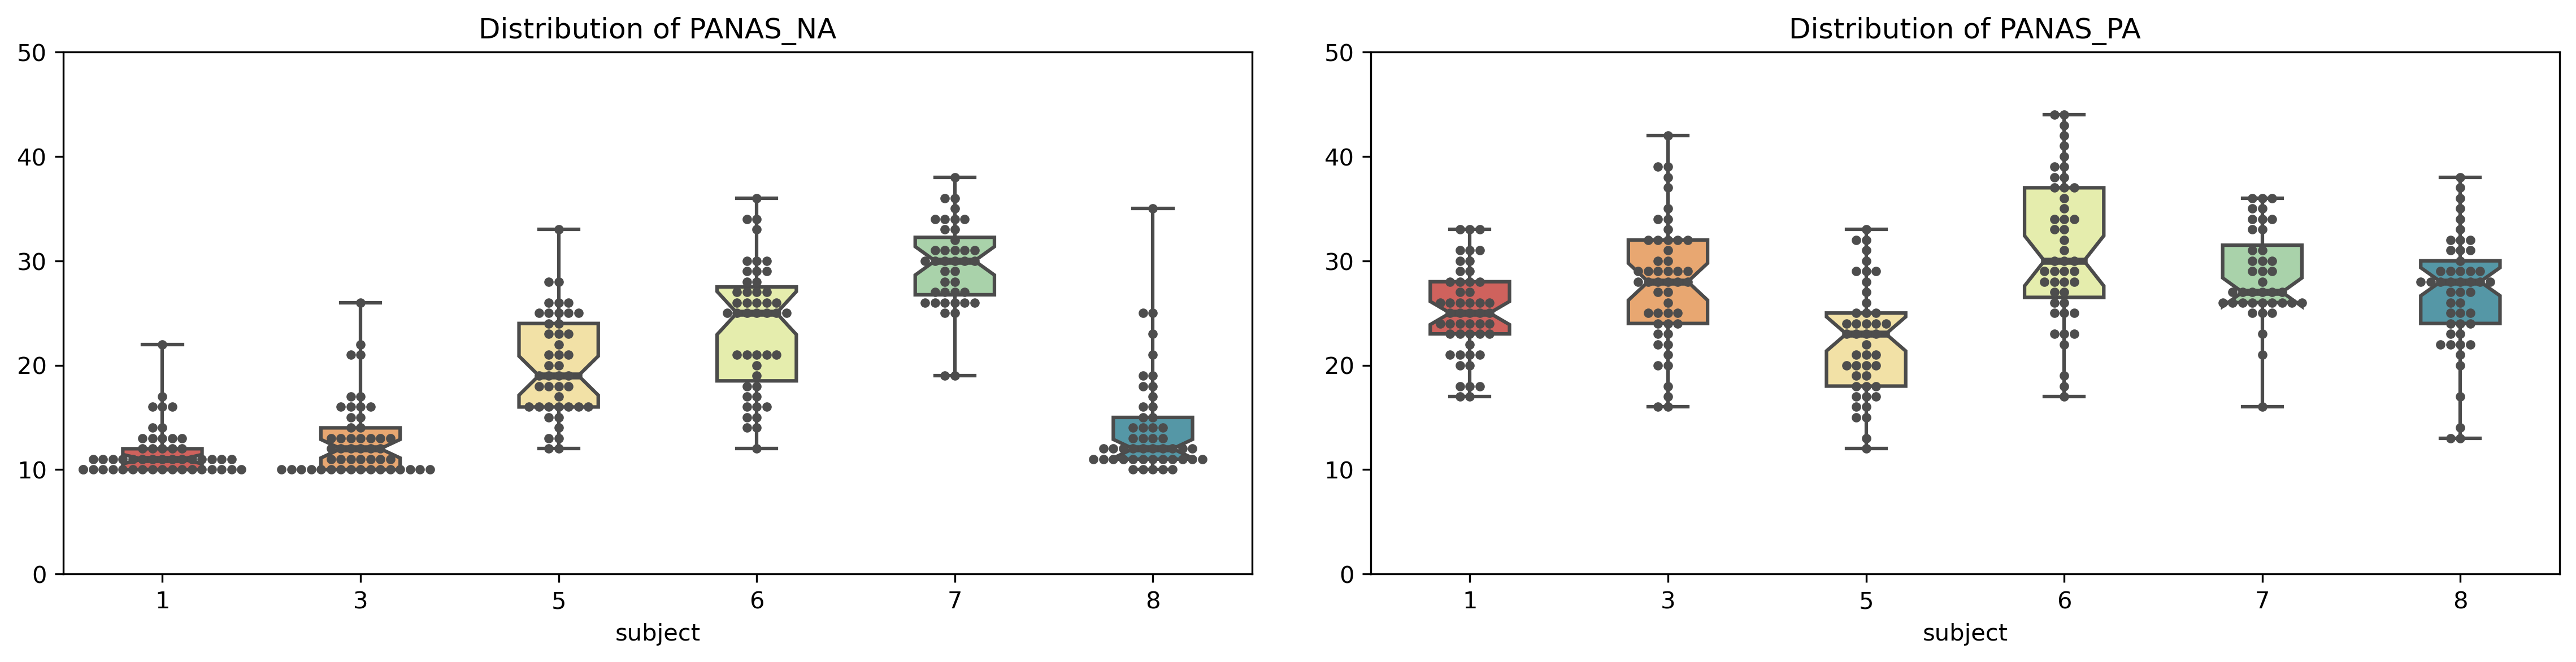

In [18]:
# Boxplot and swarmplots of PANAS NA and PA


fig, axes = plt.subplots(1, 2, figsize = (19,4), dpi=300)
plt.subplots_adjust(wspace=0.1)
medianprops = dict(linewidth=3)

# PANAS NA
sns.boxplot(ax=axes[0], x='subject',y='PANAS_NA', data=panas_df, whis=np.inf, width=0.4, 
            medianprops =medianprops, notch = True, palette = "Spectral")
sns.swarmplot(ax=axes[0], x='subject',y='PANAS_NA', data=panas_df, color=".3", size=4).set_title('Distribution of PANAS_NA')
axes[0].set_ylim([0,50])
axes[0].set_ylabel("")

# PANAS PA
sns.boxplot(ax=axes[1],x='subject',y='PANAS_PA', data=panas_df, whis=np.inf, width=0.4, 
            medianprops =medianprops, notch = True, palette = "Spectral")
sns.swarmplot(ax=axes[1], x='subject',y='PANAS_PA', data=panas_df, color=".3", size=4).set_title('Distribution of PANAS_PA')
axes[1].set_ylim([0,50])
axes[1].set_ylabel("")

plt.savefig("output_figures/boxplot_swarmplot_PANAS_PA_NA.svg")

plt.show()

<a name="descr"/>

## Descriptive statistics

In [19]:
# Making a table with average, standard deviation and range for PA
mean_pa =  panas_df.groupby('subject')["PANAS_PA"].mean()
sd_pa =  panas_df.groupby('subject')["PANAS_PA"].apply(lambda x: statistics.stdev(x.tolist()))
min_pa = panas_df.groupby('subject')["PANAS_PA"].min() 
max_pa = panas_df.groupby('subject')["PANAS_PA"].max()
minmax_pa = min_pa.astype(str) + '-' + max_pa.astype(str)

pd.DataFrame([mean_pa, sd_pa, minmax_pa], index = ['mean', 'stdev', 'min-max']).T

,mean,stdev,min-max
subject,,,
1,25.0,4.17964,17-33
3,27.88,6.002176,16-42
5,22.4,5.31892,12-33
6,31.170213,6.948003,17-44
7,28.6,4.395802,16-36
8,26.795918,5.642028,13-38


In [20]:
# Making a table with average, standard deviation and range for NA
mean_na =  panas_df.groupby('subject')["PANAS_NA"].mean()
sd_na =  panas_df.groupby('subject')["PANAS_NA"].apply(lambda x: statistics.stdev(x.tolist()))
min_na = panas_df.groupby('subject')["PANAS_NA"].min()
max_na = panas_df.groupby('subject')["PANAS_NA"].max()
minmax_na = min_na.astype(str) + '-' + max_na.astype(str)



pd.DataFrame([mean_na, sd_na, minmax_na], index = ['mean', 'stdev', 'min-max']).T

,mean,stdev,min-max
subject,,,
1,11.7,2.340853,10-22
3,12.92,3.596143,10-26
5,20.111111,4.881422,12-33
6,23.723404,5.995296,12-36
7,29.5,4.163332,19-38
8,14.122449,4.884639,10-35


In [21]:
# Total number of days for each subject
total_days = panas_df.groupby('subject')["daysFromFirstScan"].max()

# Number of sessions per subject
total_sessions = panas_df.groupby('subject')["session_num"].max()+1

# Mean interval of sessions per subject
session_interval = total_days/total_sessions

pd.DataFrame([total_days, total_sessions, session_interval], index = ['number of days', 'number of sessions', 'mean interval']).T

,number of days,number of sessions,mean interval
subject,,,
1,168.0,50.0,3.360000
3,189.0,50.0,3.780000
5,208.0,45.0,4.622222
6,170.0,47.0,3.617021
7,218.0,40.0,5.450000
8,232.0,49.0,4.734694


In [24]:
# Total average between subject and standard deviation for PA

inter_mean_pa =  panas_df.groupby('subject')["PANAS_PA"].mean().mean()
inter_sd_pa =  statistics.stdev(mean_pa)

print("Average ± SD inter-subject (PA) : ", inter_mean_pa, "±" ,inter_sd_pa)

Average ± SD inter-subject (PA) :  26.97435518888406 ± 3.03060317059551


In [25]:
# ANOVA between subjects for PA
# Results show a significant difference between subjects

model_pa=ols("PANAS_PA ~ C(subject)", data= panas_df).fit()
aov_table = sm.stats.anova_lm(model_pa, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(subject),2112.121095,5.0,13.881789,4.219225e-12
Residual,8368.277482,275.0,NaN,NaN


In [27]:
# Total average between subject and standard deviation for NA

inter_mean_na =  panas_df.groupby('subject')["PANAS_NA"].mean().mean()
inter_sd_na =  statistics.stdev(mean_na)

print("Average ± SD inter-subject (NA) : ", inter_mean_na, "±" ,inter_sd_na)

Average ± SD inter-subject (NA) :  18.67949405767035 ± 7.031723476683005


In [28]:
# ANOVA between subjects for NA
# Results show a significant difference between subjects

model=ols("PANAS_NA ~ C(subject)", data= panas_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(subject),11026.670407,5.0,111.78507,3.842573e-64
Residual,5425.294006,275.0,NaN,NaN


In [29]:
# Comparison of inter and intra variances (caution: using skewd data (n=50 vs n=6)) 

inter_intra_pa = np.mean(sd_pa)/inter_sd_pa
inter_intra_na = np.mean(sd_na)/inter_sd_na

# Calculating ratio without floor effects (ignoring subjects 1, 3, 8)
inter_intra_na_floor = np.mean(sd_na[[5, 6, 7]])/statistics.stdev(mean_na[[5, 6, 7]])


#Values ⩾ 1 indicate within-subject variability in PA over time is as large or larger than between-subject variability.
print("""Ratios between intra-individual and inter-individual variances
PA : """, inter_intra_pa, """
NA : """, inter_intra_na, """
NA w/out floor effects : """, inter_intra_na_floor)

Ratios between intra-individual and inter-individual variances
PA :  1.786584368962021 
NA :  0.612976426039189 
NA w/out floor effects :  1.058598341061143


<hr>

<a name="brainnet"/>

# Creation of the partial atlas based on the Brainnetome and BrainMap taxonomy

## Table of contents:
[Setting up](#set-atlas)<br>
[Selecting brainmap emotion regions](#brainmap-emotion)<br>
[Brainnetome table (with region numbers and region names, scores)](#brainnetome-table) <br>
[Selecting emotion regions with brainmap](#brainnetome-emotion)<br>
[Selecting the top 15 regions](#top15)

<a name="set-atlas"/>

## Setting up

In [30]:
import nilearn
from nilearn import regions
from nilearn import plotting
from nilearn import masking
from nilearn import image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import seaborn as sns
import re

In [31]:
# Enables text editing in svg files for matplotlib
# From : https://stackoverflow.com/questions/50345077/how-do-i-save-the-text-in-python-plots-editable-in-svg-files

new_rc_params = {'text.usetex': False,"svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)

In [33]:
# Opening file with brainmap taxonomy tags
with open('input_data/BDf_FDR05.json') as json_file:
    data = json.load(json_file)
    
# A table with every label    
taxon = pd.DataFrame(data)

<a name="brainmap-emotion"/>

## Selecting regions involved in emotions according to the BrainMap taxonomy for the Brainnetome

In [34]:
# Keeping only emotion labels
# "Emotion" is present 118 times in the document, but includes only 67 regions
em_table = taxon.filter(like="Emotion", axis = 0)
# Dropping columns containing no values
em_table = em_table.dropna(axis = 1, how='all')
em_table

,3,5,6,12,13,14,19,36,37,41,...,220,223,224,225,226,227,228,232,237,238
Emotion,2.73,2.24,1.82,1.43,2.13,1.96,1.85,1.79,NaN,2.31,...,2.51,2.78,2.80,1.93,2.06,1.78,1.9,1.7,1.77,2.14
Emotion.Sadness,NaN,NaN,3.33,NaN,1.57,3.27,NaN,3.77,NaN,NaN,...,NaN,2.50,2.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emotion.Happiness,NaN,NaN,NaN,NaN,NaN,4.99,NaN,NaN,NaN,NaN,...,NaN,4.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emotion.Disgust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.57,2.15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emotion.Fear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.12,...,NaN,NaN,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emotion.Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emotion.Anger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Creating the list of emotion-related regions and transforming the str to int (for region numbers)
emotion_regions = em_table.columns
emotion_regions = [int(x) for x in emotion_regions]

<a name="brainnetome-table"/>


## Making a table of brainnetome regions

In [36]:
# Table copied from the brainnetome article, information is separated by tab
brain_names = pd.read_csv('input_data/Brainnetome_names.csv', sep="\t")
brain_names.head()

,Gyrus,Area Code Left and right hemispheres,Label ID.L,Label ID.R,Modified cyto-architectonic,"lh.MNI(X,Y,Z)","rh.MNI(X, Y, Z)"
0,Superior frontal gyrus,SFG_L(R)_7_1,1,2,"A8m, medial area 8","−5 ,15, 54","7, 16, 54"
1,Superior frontal gyrus,SFG_L(R)_7_2,3,4,"A8dl, dorsolateral area 8","−18, 24, 53","22, 26, 51"
2,Superior frontal gyrus,SFG_L(R)_7_3,5,6,"A9l, lateral area 9","−11, 49, 40","13, 48, 40"
3,Superior frontal gyrus,SFG_L(R)_7_4,7,8,"A6dl, dorsolateral area 6","−18, −1, 65","20, 4, 64"
4,Superior frontal gyrus,SFG_L(R)_7_5,9,10,"A6m, medial area 6","−6, −5, 58","7, −4, 60"


In [38]:
# Duplicating the table to fit with the list of brainnetome regions
# From : https://stackoverflow.com/questions/50788508/how-can-i-replicate-rows-in-pandas
brain_names_short =brain_names.iloc[:,[0, 4]]
brain_names_dupl = pd.DataFrame(np.repeat(brain_names_short.values, 2, axis=0))
brain_names_dupl.columns = brain_names_short.columns

# Recuperating region numbers and codes for left and right regions
brain_codes = pd.read_csv('input_data/Brainnetome_codes246.csv', sep=" ", header=None, names=["Region_number", "Region_code"])
brain_codes.head()

# Merging the two tables
brain_names_dupl["Region_number"] = brain_codes["Region_number"] 
brain_regions_table = pd.merge(brain_codes, brain_names_dupl, on="Region_number")

brain_regions_table.head()

,Region_number,Region_code,Gyrus,Modified cyto-architectonic
0,1,SFG_L_7_1,Superior frontal gyrus,"A8m, medial area 8"
1,2,SFG_R_7_1,Superior frontal gyrus,"A8m, medial area 8"
2,3,SFG_L_7_2,Superior frontal gyrus,"A8dl, dorsolateral area 8"
3,4,SFG_R_7_2,Superior frontal gyrus,"A8dl, dorsolateral area 8"
4,5,SFG_L_7_3,Superior frontal gyrus,"A9l, lateral area 9"


### Making a table with the emotion regions and their scores

In [39]:
# Keeping only emotion labels from Brainmap with em_table
em_table_T= em_table.T

# Preparing table for merging
em_table_T.index= em_table_T.index.set_names(['Region_number'])
em_table_T=em_table_T.reset_index()
em_table_T["Region_number"]=em_table_T["Region_number"].astype(int)

# Merging the two tables (regions and scores)
emotion_scores_table = pd.merge(brain_regions_table, em_table_T, on="Region_number")

emotion_scores_table.head()

,Region_number,Region_code,Gyrus,Modified cyto-architectonic,Emotion,Emotion.Sadness,Emotion.Happiness,Emotion.Disgust,Emotion.Fear,Emotion.Anxiety,Emotion.Anger
0,3,SFG_L_7_2,Superior frontal gyrus,"A8dl, dorsolateral area 8",2.73,NaN,NaN,NaN,NaN,NaN,NaN
1,5,SFG_L_7_3,Superior frontal gyrus,"A9l, lateral area 9",2.24,NaN,NaN,NaN,NaN,NaN,NaN
2,6,SFG_R_7_3,Superior frontal gyrus,"A9l, lateral area 9",1.82,3.33,NaN,NaN,NaN,NaN,NaN
3,12,SFG_R_7_6,Superior frontal gyrus,"A9m, medial area 9",1.43,NaN,NaN,NaN,NaN,NaN,NaN
4,13,SFG_L_7_7,Superior frontal gyrus,"A10m, medial area 10",2.13,1.57,NaN,NaN,NaN,NaN,NaN


In [40]:
# Sorting in descending order
emotion_scores_table.sort_values(by=['Emotion'], ascending=False).head()

,Region_number,Region_code,Gyrus,Modified cyto-architectonic,Emotion,Emotion.Sadness,Emotion.Happiness,Emotion.Disgust,Emotion.Fear,Emotion.Anxiety,Emotion.Anger
49,211,Amyg_L_2_1,Amygdala,"mAmyg, medial amygdala",6.32,3.93,7.22,8.89,2.09,NaN,NaN
13,45,OrG_L_6_3,Orbital gyrus,"A11l, lateral area 11",5.95,NaN,NaN,NaN,NaN,NaN,NaN
21,69,STG_L_6_1,Superior temporal gyrus,"A38m, medial area 38",4.91,NaN,6.18,1.85,NaN,NaN,NaN
41,177,CG_L_7_2,Cingulate gyrus,"A24rv, rostroventral area 24",3.84,NaN,NaN,NaN,NaN,NaN,NaN
11,43,OrG_L_6_2,Orbital gyrus,"A12/47o, orbital area 12/47",3.59,1.64,NaN,NaN,NaN,NaN,NaN


<a name="brainnetome-emotion"/>

## Extracting the regions from the Brainnetome atlas

In [41]:
# Setting up files needed for atlas
bn_path = ("input_data/BN_Atlas_246_3mm.nii.gz")
mni_path = ("input_data/MNI152_T1_3mm_brain.nii.gz")
bn_atlas = nilearn.image.load_img(bn_path)
bn_data = bn_atlas.get_fdata() 

anat = image.load_img('input_data/template_icbm_sym_09_white.nii.gz')

In [42]:
# Calculating top values for every region and organizong in descending order
top15 = em_table.max().sort_values(ascending=False)[:15]
top15

213    10.12
211     8.89
212     8.78
170     7.40
79      7.10
214     6.58
50      6.56
69      6.18
45      5.95
216     5.49
14      4.99
215     4.88
202     4.82
76      4.78
169     4.76
dtype: float64

In [43]:
# Region names
regions15 = top15.index
regions15 = [int(x) for x in regions15]

top15_names = emotion_scores_table.loc[emotion_scores_table['Region_number'].isin(regions15)].iloc[:,[0, 1, 2, 3]]
top15_names

,Region_number,Region_code,Gyrus,Modified cyto-architectonic
5,14,SFG_R_7_7,Superior frontal gyrus,"A10m, medial area 10"
13,45,OrG_L_6_3,Orbital gyrus,"A11l, lateral area 11"
18,50,OrG_R_6_5,Orbital gyrus,"A13, area 13"
21,69,STG_L_6_1,Superior temporal gyrus,"A38m, medial area 38"
23,76,STG_R_6_4,Superior temporal gyrus,"A22c, caudal area 22"
25,79,STG_L_6_6,Superior temporal gyrus,"A22r, rostral area 22"
36,169,INS_L_6_4,Insular lobe,"vId/vIg, ventral dysgranular and granular insula"
37,170,INS_R_6_4,Insular lobe,"vId/vIg, ventral dysgranular and granular insula"
48,202,LOcC_R_4_2,Lateral occipital cortex,"V5/MT+, area V5/MT+"
49,211,Amyg_L_2_1,Amygdala,"mAmyg, medial amygdala"


In [44]:
# Exporting CSV
top15_names.to_csv("output_data/brainnetome_15_regions_codes.csv", index=False, encoding='utf-8-sig')

In [45]:
# Extracting regions' names, method taken from : https://stackoverflow.com/questions/68568765/extracting-letters-until-a-comma-with-pandas-and-regex

top15_names['region_abbr'] = top15_names['Modified cyto-architectonic'].str.extract('(.+?),')

# Extracting information of lateralisation

top15_names['region_hemisphere'] = top15_names['Region_code'].str.extract('_([^_]+)_')

# Merging information of the two columns

top15_names['region_name']= top15_names['region_hemisphere'] + '-' + top15_names['region_abbr']

In [46]:
top15_names['region_name']

5        R-A10m
13       L-A11l
18        R-A13
21       L-A38m
23       R-A22c
25       L-A22r
36    L-vId/vIg
37    R-vId/vIg
48     R-V5/MT+
49      L-mAmyg
50      R-mAmyg
51      L-lAmyg
52      R-lAmyg
53      L-rHipp
54      R-rHipp
Name: region_name, dtype: object

In [47]:
# Exporting regions names
top15_names['region_name'].to_csv( "output_data/brainnetome_15_regions_names.csv", index=False, encoding='utf-8-sig')

In [48]:
# Making a boolean mask of True/False for selected region values
masker15 = np.isin(bn_data, regions15)

# Information about the original 3D shape of the data (to be used later)
np.shape(bn_data)

(61, 73, 61)

In [49]:
# Zipping together each value with the corresponding boolean
zipped15 = list(zip(bn_data.flatten(), masker15.flatten()))

# Keeping the region value if it is True (in the regions list) and inserting 0 if False, filtering the selected regions
result15 =  []
for v, m in zipped15:
    if m == True:
        result15.append(v)
    else:
        result15.append(0)
        
# Re-giving the 3d shape to the array
flat15 = np.array(result15)
filtered_atlas15 = np.reshape(flat15, (61, 73, 61))



# Creating the nifti-like object
brainmap_atlas_top15 = image.new_img_like(bn_atlas,filtered_atlas15)

In [50]:
# Changing the region numbers from 1 to 15 for added clarity

data15 = brainmap_atlas_top15.get_fdata()
renum15 = (((data15 == 14).astype(int)*1)+ 
         ((data15 == 45).astype(int)*2)+
         ((data15 == 50).astype(int)*3)+
         ((data15 == 69).astype(int)*4)+
         ((data15 == 76).astype(int)*5)+
         ((data15 == 79).astype(int)*6)+
         ((data15 == 169).astype(int)*7)+
         ((data15 == 170).astype(int)*8)+
         ((data15 == 202).astype(int)*9)+
         ((data15 == 211).astype(int)*10)+
         ((data15 == 212).astype(int)*11)+
         ((data15 == 213).astype(int)*12)+
         ((data15 == 214).astype(int)*13)+
         ((data15 == 215).astype(int)*14)+
         ((data15 == 216).astype(int)*15))

# Creating the nifti-like object
renumbered15 = image.new_img_like(bn_atlas,renum15)

In [51]:
# Verifying regions
np.unique(renumbered15.get_fdata())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

In [52]:
# Re-sampling
brainmap_atlas_res15_renum= image.resample_to_img(renumbered15,mni_path,interpolation='nearest')

# Saving file
brainmap_atlas_res15_renum.to_filename('output_data/brainmap_atlas_top15_resampled.nii.gz')

<Figure size 4000x2000 with 0 Axes>

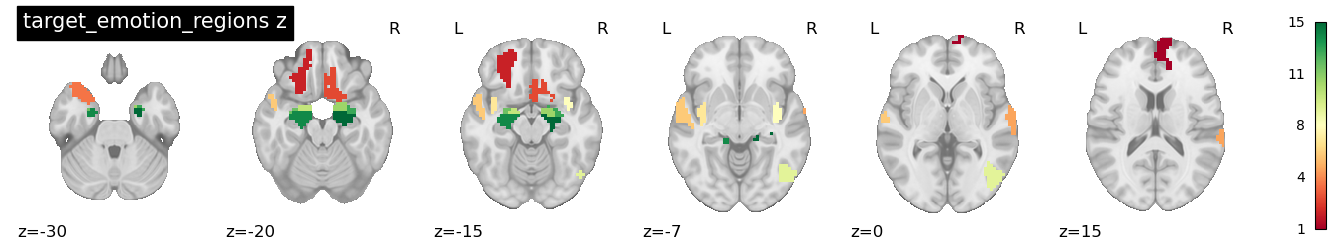

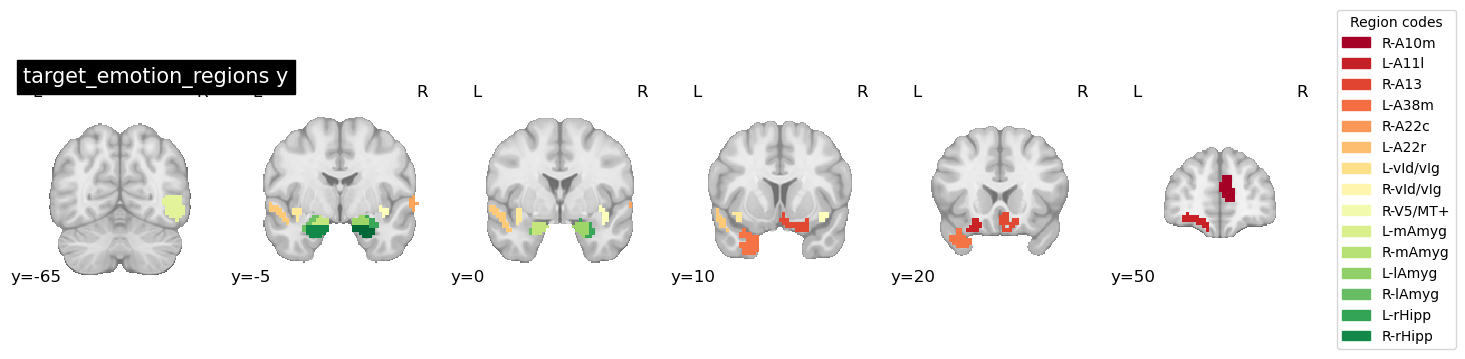

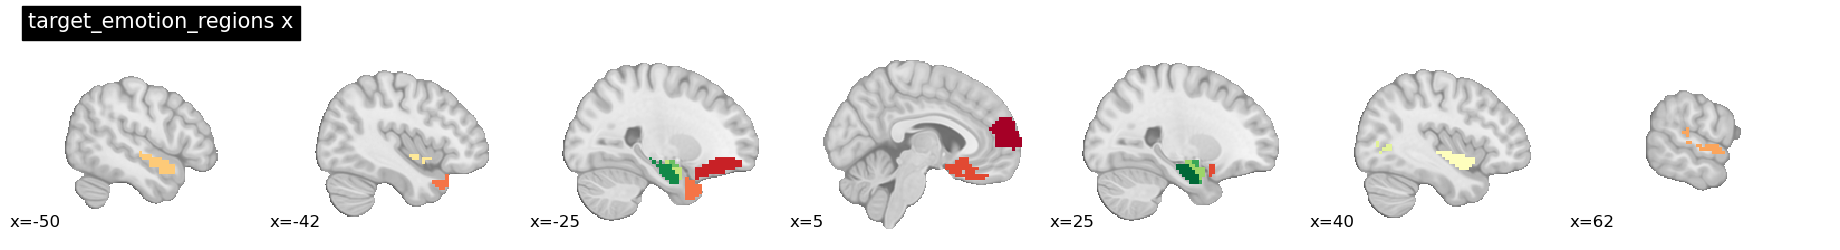

In [53]:
fig = plt.figure(figsize=(40,20))

# Display Z cuts
display = plotting.plot_anat(anat_img=anat,
                             display_mode='z',
                             cut_coords=[-30, -20, -15, -7, 0, 15],
                             title = "target_emotion_regions z",
                             annotate=True,
                             draw_cross=False)

display.add_overlay(renumbered15,
                    colorbar=True,
                    cbar_tick_format="%i",
                    cmap="RdYlGn")

plt.savefig("output_figures/brainmap15_Z.svg")


# Display Y cuts
display = plotting.plot_anat(anat_img=anat,
                             display_mode='y',
                             cut_coords=[-65,-5, 0, 10, 20, 50],
                             title = "target_emotion_regions y",
                             annotate=True,
                             draw_cross=False)

display.add_overlay(renumbered15,
                    colorbar=False,
                    cmap='RdYlGn')

###############################################
# Add legend

import matplotlib.patches as mpatches
import matplotlib as mpl

# Settings for color
val_max= 15
val_min= 0
norm = mpl.colors.Normalize(vmin=val_min, vmax=val_max)

leg_regions = []
for code, color in zip(top15_names['region_name'], range(15)):
        temp = mpatches.Patch(color=mpl.cm.RdYlGn((norm(color))),label=code)
        leg_regions.append(temp)

plt.legend(handles=leg_regions, loc= "center left", bbox_to_anchor=(1, 0.5), title = "Region codes")
###############################################

plt.savefig("output_figures/brainmap15_Y.svg")



# Display X cuts
display = plotting.plot_anat(anat_img=anat,
                             display_mode='x',
                             cut_coords=[-50,-42,-25,5,25,40,62],
                             title = "target_emotion_regions x",
                             annotate=True,
                             draw_cross=False)

display.add_overlay(renumbered15,
                    colorbar=False,
                    cmap='RdYlGn')

plt.savefig("output_figures/brainmap15_X.svg")    

In [ ]:
# Exporting legend
# From : https://stackoverflow.com/questions/4534480/get-legend-as-a-separate-picture-in-matplotlib

legend = plt.legend(handles=leg_regions, title = "Regions")

def export_legend(legend, filename="legend.svg", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig("output_figures/brainmap15_legend.svg", dpi="figure", bbox_inches=bbox)

export_legend(legend)

### Bargraph of every emotion label for our chosen regions

In [55]:
# Calculating top values for every region and organizing in descending order
top15 = em_table.max().sort_values(ascending=False)[:15]

In [56]:
# A table of the labels for the 15 regions
table_15_names= top15_names['region_name']

em_15_table = em_table[top15.index]
em_15_table.columns=table_15_names
em_15_table

region_name,R-A10m,L-A11l,R-A13,L-A38m,R-A22c,L-A22r,L-vId/vIg,R-vId/vIg,R-V5/MT+,L-mAmyg,R-mAmyg,L-lAmyg,R-lAmyg,L-rHipp,R-rHipp
Emotion,2.63,6.32,2.34,NaN,NaN,2.93,2.58,4.91,5.95,1.59,1.96,3.17,NaN,NaN,NaN
Emotion.Sadness,4.48,3.93,8.78,NaN,7.10,NaN,3.88,NaN,NaN,NaN,3.27,4.88,NaN,NaN,NaN
Emotion.Happiness,10.12,7.22,NaN,NaN,2.67,3.57,3.93,6.18,NaN,5.49,4.99,3.32,NaN,4.78,NaN
Emotion.Disgust,4.23,8.89,7.87,7.4,NaN,6.58,NaN,1.85,NaN,NaN,NaN,3.51,4.82,NaN,4.76
Emotion.Fear,2.21,2.09,4.16,NaN,NaN,2.14,6.56,NaN,NaN,1.86,NaN,2.75,NaN,NaN,3.01
Emotion.Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emotion.Anger,NaN,NaN,5.02,NaN,NaN,4.76,NaN,NaN,NaN,3.07,NaN,NaN,NaN,NaN,NaN


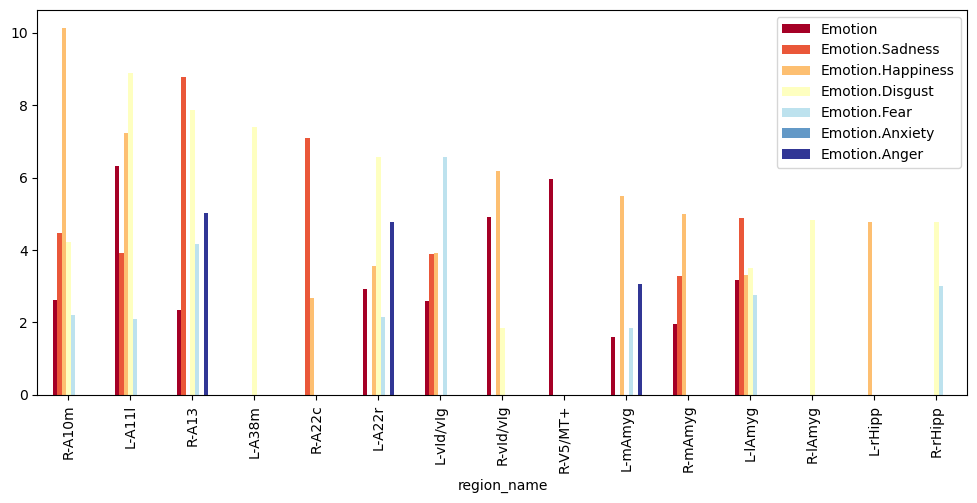

In [57]:
# Simple bargraph

table_15_names= top15_names['region_name']


ax =em_15_table.T.plot(kind='bar',figsize=(12,5), colormap='RdYlBu')
ax.figure.savefig("output_figures/emotion_region_taxon_scores.svg", bbox_inches='tight')

<hr>

<a name="extract"/>

# Extraction of functional connectome

Original by Salima Smine adapted by Jeanne Racicot

In [59]:
# Selecting workspace
os.chdir('') # Add path to document containing data files

In [60]:
import os
import time
import pandas as pd
import numpy as np

from nilearn import image
from nilearn import input_data
from nilearn import signal
from nilearn import connectome
from nilearn.interfaces.fmriprep import load_confounds

import bids
from bids import BIDSLayout
from load_confounds import Confounds
from load_confounds import AnatCompCor

import process_bids as pb
import process_connectome as pc

pd.options.mode.chained_assignment = None
bids.config.set_option('extension_initial_dot', True)
import warnings
warnings.filterwarnings("ignore")

C:\Users\racic\AppData\Roaming\Python\Python38\site-packages\nilearn\input_data\__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
C:\Users\racic\anaconda3\lib\site-packages\bids\config.py:39: FutureWarning: Setting 'extension_initial_dot' will be removed in pybids 0.16.
  warnings.warn("Setting 'extension_initial_dot' will be removed in pybids 0.16.",


In [61]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings
import os
# Global variables listing the admissible types of noise components
all_confounds = ["motion", "high_pass", "wm_csf", "global", "compcor"]

def _add_suffix(params, model):
    """
    Add suffixes to a list of parameters.
    Suffixes includes derivatives, power2 and full
    """
    params_full = params.copy()
    suffix = {
        "basic": {},
        "derivatives": {"derivative1"},
        "power2": {"power2"},
        "full": {"derivative1", "power2", "derivative1_power2"},
    }
    for par in params:
        for suff in suffix[model]:
            params_full.append(f"{par}_{suff}")
    return params_full
def _check_params(confounds_raw, params):
    """Check that specified parameters can be found in the confounds."""
    for par in params:
        if not par in confounds_raw.columns:
            raise ValueError(
                f"The parameter {par} cannot be found in the available confounds. You may want to use a different denoising strategy'"
            )
    return None
def _find_confounds(confounds_raw, keywords):
    """Find confounds that contain certain keywords."""
    list_confounds = []
    for key in keywords:
        key_found = False
        for col in confounds_raw.columns:
            if key in col:
                list_confounds.append(col)
                key_found = True
        if not key_found:
            raise ValueError(f"could not find any confound with the key {key}")
    return list_confounds
def _load_global(confounds_raw, global_signal):
    """Load the regressors derived from the global signal."""
    global_params = _add_suffix(["global_signal"], global_signal)
    _check_params(confounds_raw, global_params)
    return confounds_raw[global_params]
def _load_wm_csf(confounds_raw, wm_csf):
    """Load the regressors derived from the white matter and CSF masks."""
    wm_csf_params = _add_suffix(["csf", "white_matter"], wm_csf)
    _check_params(confounds_raw, wm_csf_params)
    return confounds_raw[wm_csf_params]
def _load_high_pass(confounds_raw):
    """Load the high pass filter regressors."""
    high_pass_params = _find_confounds(confounds_raw, ["cosine"])
    return confounds_raw[high_pass_params]
def _label_compcor(confounds_raw, compcor_suffix, n_compcor):
    """Builds list for the number of compcor components."""
    compcor_cols = []
    for nn in range(n_compcor + 1):
        nn_str = str(nn).zfill(2)
        compcor_col = compcor_suffix + "_comp_cor_" + nn_str
        if compcor_col not in confounds_raw.columns:
            warnings.warn(f"could not find any confound with the key {compcor_col}")
        else:
            compcor_cols.append(compcor_col)
    return compcor_cols
def _load_compcor(confounds_raw, compcor, n_compcor):
    """Load compcor regressors."""
    if compcor == "anat":
        compcor_cols = _label_compcor(confounds_raw, "a", n_compcor)
    if compcor == "temp":
        compcor_cols = _label_compcor(confounds_raw, "t", n_compcor)
    if compcor == "full":
        compcor_cols = _label_compcor(confounds_raw, "a", n_compcor)
        compcor_cols.extend(_label_compcor(confounds_raw, "t", n_compcor))
    compcor_cols.sort()
    _check_params(confounds_raw, compcor_cols)
    return confounds_raw[compcor_cols]
def _load_motion(confounds_raw, motion, n_motion):
    """Load the motion regressors."""
    motion_params = _add_suffix(
        ["trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z"], motion
    )
    _check_params(confounds_raw, motion_params)
    confounds_motion = confounds_raw[motion_params]
    # Optionally apply PCA reduction
    if n_motion > 0:
        confounds_motion = _pca_motion(confounds_motion, n_components=n_motion)
    return confounds_motion
def _pca_motion(confounds_motion, n_components):
    """Reduce the motion paramaters using PCA."""
    n_available = confounds_motion.shape[1]
    if n_components > n_available:
        raise ValueError(
            f"User requested n_motion={n_components} motion components, but found only {n_available}."
        )
    confounds_motion = confounds_motion.dropna()
    confounds_motion_std = scale(
        confounds_motion, axis=0, with_mean=True, with_std=True
    )
    pca = PCA(n_components=n_components)
    motion_pca = pd.DataFrame(pca.fit_transform(confounds_motion_std))
    motion_pca.columns = ["motion_pca_" + str(col + 1) for col in motion_pca.columns]
    return motion_pca
def _sanitize_strategy(strategy):
    """Defines the supported denoising strategies."""
    if isinstance(strategy, list):
        for conf in strategy:
            if not conf in all_confounds:
                raise ValueError(f"{conf} is not a supported type of confounds.")
    else:
        raise ValueError("strategy needs to be a list of strings")
    return strategy
def _confounds_to_df(confounds_raw):
    """Load raw confounds as a pandas DataFrame."""
    if not isinstance(confounds_raw, pd.DataFrame):
        if "nii" in confounds_raw[-6:]:
            suffix = "_space-" + confounds_raw.split("space-")[1]
            confounds_raw = confounds_raw.replace(
                suffix, "_desc-confounds_timeseries.tsv",
            )
            # fmriprep has changed the file suffix between v20.1.1 and v20.2.0 with respect to BEP 012.
            # cf. https://neurostars.org/t/naming-change-confounds-regressors-to-confounds-timeseries/17637
            # Check file with new naming scheme exists or replace, for backward compatibility.
            if not os.path.exists(confounds_raw):
                confounds_raw = confounds_raw.replace(
                    "_desc-confounds_timeseries.tsv", "_desc-confounds_regressors.tsv",
                )
        confounds_raw = pd.read_csv(confounds_raw, delimiter="\t", encoding="utf-8")
    return confounds_raw

def _sanitize_confounds(confounds_raw):
    """Make sure the inputs are in the correct format."""
    # we want to support loading a single set of confounds, instead of a list
    # so we hack it
    flag_single = isinstance(confounds_raw, str) or isinstance(
        confounds_raw, pd.DataFrame
    )
    if flag_single:
        confounds_raw = [confounds_raw]
    return confounds_raw, flag_single
def _confounds_to_ndarray(confounds, demean):
    """Convert confounds from a pandas dataframe to a numpy array."""
    # Convert from DataFrame to numpy ndarray
    labels = confounds.columns
    confounds = confounds.values
    # Derivatives have NaN on the first row
    # Replace them by estimates at second time point,
    # otherwise nilearn will crash.
    mask_nan = np.isnan(confounds[0, :])
    confounds[0, mask_nan] = confounds[1, mask_nan]
    # Optionally demean confounds
    if demean:
        confounds = scale(confounds, axis=0, with_std=False)
    return confounds, labels
def _load_single(self, confounds_raw):
    """Load a single confounds file from fmriprep."""
    # Convert tsv file to pandas dataframe
    confounds_raw = _confounds_to_df(confounds_raw)
    confounds = pd.DataFrame()
    if "motion" in self.strategy:
        confounds_motion = _load_motion(confounds_raw, self.motion, self.n_motion)
        confounds = pd.concat([confounds, confounds_motion], axis=1)
    if "high_pass" in self.strategy:
        confounds_high_pass = _load_high_pass(confounds_raw)
        confounds = pd.concat([confounds, confounds_high_pass], axis=1)
    if "wm_csf" in self.strategy:
        confounds_wm_csf = _load_wm_csf(confounds_raw, self.wm_csf)
        confounds = pd.concat([confounds, confounds_wm_csf], axis=1)
    if "global" in self.strategy:
        confounds_global_signal = _load_global(confounds_raw, self.global_signal)
        confounds = pd.concat([confounds, confounds_global_signal], axis=1)
    if "compcor" in self.strategy:
        confounds_compcor = _load_compcor(
            confounds_raw, self.compcor, self.n_compcor
        )
        confounds = pd.concat([confounds, confounds_compcor], axis=1)
    confounds, labels = _confounds_to_ndarray(confounds, self.demean)
    return confounds, labels

Confounds._load_single = _load_single

### Load input data

In [62]:
dataset_name = 'day2day'
raw_path = os.path.abspath('../day2day')

derivatives_path = os.path.abspath('../day2day-fmriprep')

# Reading BIDS format
layout = BIDSLayout(raw_path, derivatives = derivatives_path, validate = False)

layout

BIDS Layout: ...D:\Temp_Compute_Canada\day2day | Subjects: 8 | Sessions: 309 | Runs: 8

### Input variables

In [63]:
subjects_id_list = layout.get_subjects()
t_r = layout.get_tr()
print('Subjects ID:', subjects_id_list)

Subjects ID: ['05', '08', '03', '07', '01', '06', '04', '02']


### Load brain parcellation

In [64]:
atlas_name = 'brainmap_atlas_top15_resampled'
atlas_path = os.path.abspath(r'') # Add path to atlas
atlas_masker = input_data.NiftiLabelsMasker(atlas_path, standardize=False, low_pass=0.01, t_r=t_r)

### Parallel processing for time series calculation

In [65]:
time_series_info = pd.DataFrame(columns = subjects_id_list, index = ['path','nlevels','atlas','tr'])
time_series_info.loc['atlas',:] = atlas_name
time_series_info.loc['tr',:] = t_r

In [66]:
directory = 'timeSeries_files'

sub_dir = os.path.join(directory,dataset_name,atlas_name)
if not os.path.exists(sub_dir):
    os.makedirs(sub_dir)

confounds_name = ['None', 'aCompCor']

In [67]:
for id in subjects_id_list:

    csv_path = os.path.join(sub_dir,'id_atlas_timeSeries.csv'.replace('id',id).replace('atlas',atlas_name))

    sessions_sub = pb.get_sessions(layout, id)
    tasks_by_session_sub = pb.get_tasks(layout, id, sessions_sub)
    run_by_task_sub = pb.get_run(layout, id, sessions_sub, tasks_by_session_sub)
    subj_timeseries_df = pc.create_empty_df_timesseries(sessions_sub,tasks_by_session_sub, run_by_task_sub, 
                                                        confounds_name)
    
    subjects_im_path = layout.get(subject = id, extension='nii.gz', suffix='bold', scope='derivatives',
                                  return_type='filename')

    aCompCor = AnatCompCor().load(subjects_im_path)


    time_series_info.loc['path',id] = csv_path
    time_series_info.loc['nlevels',id] = subj_timeseries_df.columns.nlevels
    subj_timeseries_df = pc.calculate_timeseries(atlas_masker, run_by_task_sub, subjects_im_path, csv_path,
                                                subj_timeseries_df, t_r, subject_confounds_list = [aCompCor],
                                                confounds_name= confounds_name)


info_csv_path = os.path.join(sub_dir,'timeSeries_info.csv')
time_series_info.to_csv(info_csv_path, header= True)

### Subjects characteristics

In [68]:
info_csv_path = os.path.join(sub_dir,'timeSeries_info.csv')
time_series_info = pd.read_csv(info_csv_path, header = 0, index_col=0)
time_series_info

,05,08,03,07,01,06,04,02
path,timeSeries_files\day2day\brainmap_atlas_top15_...,timeSeries_files\day2day\brainmap_atlas_top15_...,timeSeries_files\day2day\brainmap_atlas_top15_...,timeSeries_files\day2day\brainmap_atlas_top15_...,timeSeries_files\day2day\brainmap_atlas_top15_...,timeSeries_files\day2day\brainmap_atlas_top15_...,timeSeries_files\day2day\brainmap_atlas_top15_...,timeSeries_files\day2day\brainmap_atlas_top15_...
nlevels,3,3,3,3,3,3,3,3
atlas,brainmap_atlas_top15_resampled,brainmap_atlas_top15_resampled,brainmap_atlas_top15_resampled,brainmap_atlas_top15_resampled,brainmap_atlas_top15_resampled,brainmap_atlas_top15_resampled,brainmap_atlas_top15_resampled,brainmap_atlas_top15_resampled
tr,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


### Connectomes calculation

In [69]:
directory = 'connectomes'

sub_dir = os.path.join(directory,dataset_name, atlas_name)
if not os.path.exists(sub_dir):
    os.makedirs(sub_dir)

confounds_name.remove('None')

for confound in confounds_name:
    conf_dir = os.path.join(sub_dir,confound)
    if not os.path.exists(conf_dir):
        os.makedirs(conf_dir)

In [70]:
kind_connect = 'correlation'
vectorize_connect = True
discard_diagonal_connect = True

pc.extract_connectomes(time_series_info, sub_dir, confounds_name, kind=kind_connect, vectorize=vectorize_connect,
                       discard_diagonal=discard_diagonal_connect)

In [71]:
# Re-setting directory to this file's location
os.chdir(sys.path[0])

<hr>

<a name="csv"/>

# Creation of combined dataframe of all subjects and sessions

## Table of contents:
* [Setting up](#set-csv)
* [Dataframe of brain connections](#conn-df) 
* [Combining with dataframe of PANAS](#panas-df) 

<a name="set-csv"/>

## Setting up

In [72]:
import os
import glob
import pandas as pd

<a name="conne-df"/>

## Dataframe of brain connections

In [73]:
# Selecting workspace
os.chdir('') # Add path to 'connectome' containing the extracted connectome files from every participants

In [74]:
# Creating an object containing all csv names
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [75]:
# Removing files with no associated data
remove_list = ['02_rest_01_1.csv', '07_rest_08_1.csv', '07_rest_32_1.csv', '07_rest_43_1.csv', '07_rest_44_1.csv']
all_filenames = [e for e in all_filenames if e not in remove_list]

In [76]:
#Transforming csvs into a dictionnary
dico_list = []
for name in all_filenames:
    dico = {'subject': name[:2], 'session':name[8:10] , 'values': pd.read_csv(name).squeeze()}
    dico_list.append(dico)

In [77]:
# Creating names for connections in DataFrame
col_names = []
for f in range(len(dico_list[0]['values'])):
    f2=f+1
    col_names.append(f'connection{f2}')

In [78]:
# Transforming the dictionnaries into a pandas DataFrame
conn_df = pd.DataFrame((dico_list[f]['values'].to_list() for f in range(len(dico_list))), columns = col_names)
conn_df.insert(0,'subject', (list(dico_list[f]['subject'] for f in range(len(dico_list)))))
conn_df.insert(1,'session_num', (list(dico_list[f]['session'] for f in range(len(dico_list)))))
conn_df.head()

,subject,session_num,connection1,connection2,connection3,connection4,connection5,connection6,connection7,connection8,...,connection96,connection97,connection98,connection99,connection100,connection101,connection102,connection103,connection104,connection105
0,01,01,0.602949,0.111389,0.821602,0.424041,0.947837,0.895337,0.705945,0.850719,...,0.597857,0.852693,0.671147,0.778559,0.863617,0.779074,0.948178,0.644432,0.899077,0.956898
1,01,02,0.906499,0.460453,0.706537,0.845642,0.951679,0.805287,0.754062,0.916444,...,0.915585,0.702110,0.638752,0.772997,-0.454699,0.905908,0.868004,-0.796504,0.949145,0.777176
2,01,03,0.938397,0.600171,0.729052,0.318822,0.444347,0.865220,0.559179,0.736081,...,0.794427,0.846933,0.930761,0.943417,0.871804,0.812448,0.914902,0.668510,0.756382,0.879732
3,01,04,0.440736,-0.238251,0.271795,-0.045758,-0.547529,0.381936,0.031021,-0.020289,...,0.405707,0.689234,0.061578,-0.036381,0.809227,0.966893,0.939857,0.190818,0.372989,0.958444
4,01,05,-0.157159,0.889304,-0.487473,-0.365984,0.779215,-0.591181,0.296623,-0.047798,...,0.697685,-0.187246,0.940908,0.940835,0.781241,0.782810,0.532584,0.758722,0.570790,0.744731


In [79]:
# Creating the session count column
# To accurately count sessions instead of using "session number", which can skip numbers
count = conn_df.pivot_table(index=['subject'], aggfunc='size')
sess_count =[]
for f in range(len(count)):
    temp = list(range(1,count[f]+1))
    sess_count+=temp

In [80]:
# Adding real session count to dataframe
conn_df.insert(1,'session_count', sess_count)
conn_df.tail()

,subject,session_count,session_num,connection1,connection2,connection3,connection4,connection5,connection6,connection7,...,connection96,connection97,connection98,connection99,connection100,connection101,connection102,connection103,connection104,connection105
299,08,45,46,0.675283,0.526283,0.904509,0.245483,0.564066,0.804882,0.296876,...,0.625353,0.366011,0.800484,0.518501,-0.928318,0.784017,0.889921,-0.539477,0.922731,0.776384
300,08,46,47,0.870035,0.897219,0.933598,0.832949,0.932848,0.921504,0.728152,...,0.915989,0.888277,-0.800061,0.810754,-0.382485,-0.831362,-0.609770,-0.886437,0.891771,0.889824
301,08,47,48,0.135001,-0.069651,0.911535,0.410716,0.891612,0.814675,-0.542872,...,-0.653471,0.508322,-0.542460,-0.705851,-0.069882,0.498497,-0.405695,0.238534,0.765046,-0.087644
302,08,48,49,0.575276,0.044124,-0.164547,0.646178,0.401930,0.699122,0.710419,...,0.880028,0.673338,0.789874,0.937860,0.865951,0.593053,0.900577,-0.619518,0.856079,0.927951
303,08,49,50,0.344335,0.618686,0.631311,0.753997,-0.274642,0.184047,0.189316,...,-0.191185,0.844302,-0.224829,0.901677,-0.481512,0.847142,0.902465,-0.038676,-0.660451,0.763312


In [81]:
# Removing the two subjects with insufficient data (2 and 4)
conn_df = conn_df[conn_df.subject !="02"]
conn_df = conn_df[conn_df.subject !="04"]

# Re-setting index correctly
conn_df.reset_index(drop=True, inplace=True)
conn_df

,subject,session_count,session_num,connection1,connection2,connection3,connection4,connection5,connection6,connection7,...,connection96,connection97,connection98,connection99,connection100,connection101,connection102,connection103,connection104,connection105
0,01,1,01,0.602949,0.111389,0.821602,0.424041,0.947837,0.895337,0.705945,...,0.597857,0.852693,0.671147,0.778559,0.863617,0.779074,0.948178,0.644432,0.899077,0.956898
1,01,2,02,0.906499,0.460453,0.706537,0.845642,0.951679,0.805287,0.754062,...,0.915585,0.702110,0.638752,0.772997,-0.454699,0.905908,0.868004,-0.796504,0.949145,0.777176
2,01,3,03,0.938397,0.600171,0.729052,0.318822,0.444347,0.865220,0.559179,...,0.794427,0.846933,0.930761,0.943417,0.871804,0.812448,0.914902,0.668510,0.756382,0.879732
3,01,4,04,0.440736,-0.238251,0.271795,-0.045758,-0.547529,0.381936,0.031021,...,0.405707,0.689234,0.061578,-0.036381,0.809227,0.966893,0.939857,0.190818,0.372989,0.958444
4,01,5,05,-0.157159,0.889304,-0.487473,-0.365984,0.779215,-0.591181,0.296623,...,0.697685,-0.187246,0.940908,0.940835,0.781241,0.782810,0.532584,0.758722,0.570790,0.744731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,08,45,46,0.675283,0.526283,0.904509,0.245483,0.564066,0.804882,0.296876,...,0.625353,0.366011,0.800484,0.518501,-0.928318,0.784017,0.889921,-0.539477,0.922731,0.776384
277,08,46,47,0.870035,0.897219,0.933598,0.832949,0.932848,0.921504,0.728152,...,0.915989,0.888277,-0.800061,0.810754,-0.382485,-0.831362,-0.609770,-0.886437,0.891771,0.889824
278,08,47,48,0.135001,-0.069651,0.911535,0.410716,0.891612,0.814675,-0.542872,...,-0.653471,0.508322,-0.542460,-0.705851,-0.069882,0.498497,-0.405695,0.238534,0.765046,-0.087644
279,08,48,49,0.575276,0.044124,-0.164547,0.646178,0.401930,0.699122,0.710419,...,0.880028,0.673338,0.789874,0.937860,0.865951,0.593053,0.900577,-0.619518,0.856079,0.927951


In [82]:
# Re-setting directory to this file's location
os.chdir(sys.path[0])

<a name="panas-df"/>

## Adding PANAS scores and Days from first scan

Refer to [Creating a dataframe from questionnaire answers](#panas-df) for the creation of the dataframe of PANAS scores


In [83]:
panas_df = pd.read_csv("output_data/panas_df.csv")

In [84]:
panas_df

,session_num,subject,daysFromFirstScan,PANAS_PA,PANAS_NA
0,0,1,0,24,12
1,1,1,2,23,16
2,2,1,7,20,17
3,3,1,9,27,16
4,4,1,14,26,12
...,...,...,...,...,...
276,44,8,220,30,11
277,45,8,222,23,12
278,46,8,224,22,25
279,47,8,226,28,14


In [85]:
# Combining datasets, keeping important data while removing duplicate columns
complete_df = pd.concat([panas_df.iloc[:, 1:3], conn_df.iloc[:, 1:], panas_df.iloc[:, 3:]], axis=1)
complete_df

,subject,daysFromFirstScan,session_count,session_num,connection1,connection2,connection3,connection4,connection5,connection6,...,connection98,connection99,connection100,connection101,connection102,connection103,connection104,connection105,PANAS_PA,PANAS_NA
0,1,0,1,01,0.602949,0.111389,0.821602,0.424041,0.947837,0.895337,...,0.671147,0.778559,0.863617,0.779074,0.948178,0.644432,0.899077,0.956898,24,12
1,1,2,2,02,0.906499,0.460453,0.706537,0.845642,0.951679,0.805287,...,0.638752,0.772997,-0.454699,0.905908,0.868004,-0.796504,0.949145,0.777176,23,16
2,1,7,3,03,0.938397,0.600171,0.729052,0.318822,0.444347,0.865220,...,0.930761,0.943417,0.871804,0.812448,0.914902,0.668510,0.756382,0.879732,20,17
3,1,9,4,04,0.440736,-0.238251,0.271795,-0.045758,-0.547529,0.381936,...,0.061578,-0.036381,0.809227,0.966893,0.939857,0.190818,0.372989,0.958444,27,16
4,1,14,5,05,-0.157159,0.889304,-0.487473,-0.365984,0.779215,-0.591181,...,0.940908,0.940835,0.781241,0.782810,0.532584,0.758722,0.570790,0.744731,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,8,220,45,46,0.675283,0.526283,0.904509,0.245483,0.564066,0.804882,...,0.800484,0.518501,-0.928318,0.784017,0.889921,-0.539477,0.922731,0.776384,30,11
277,8,222,46,47,0.870035,0.897219,0.933598,0.832949,0.932848,0.921504,...,-0.800061,0.810754,-0.382485,-0.831362,-0.609770,-0.886437,0.891771,0.889824,23,12
278,8,224,47,48,0.135001,-0.069651,0.911535,0.410716,0.891612,0.814675,...,-0.542460,-0.705851,-0.069882,0.498497,-0.405695,0.238534,0.765046,-0.087644,22,25
279,8,226,48,49,0.575276,0.044124,-0.164547,0.646178,0.401930,0.699122,...,0.789874,0.937860,0.865951,0.593053,0.900577,-0.619518,0.856079,0.927951,28,14


In [86]:
complete_df.to_csv("output_data/dataframe_day2day.csv", index=False)

<hr>

<a name="pca"/>

# Principal component analysis

Source code from Salima Smine <br>
Adapted by Jeanne Racicot

## Table of contents:
* [Setting up](#set-pca)
* [PCA explaining % of total variance](#pca-var)
* [Exporting CSVs for PCA and weights](#export)
* [Making the matrix of connections](#connection-matrix)
* [Exporting information for the top 5 weights of every component](#Top5-weights)

<a name="set-pca"/>


## Setting up

In [88]:
import os
import nilearn
from nilearn import plotting
from nilearn import masking
from nilearn import image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from itertools import product
from scipy import stats
from numpy import matlib

In [90]:
df_day2day  = pd.read_csv("output_data/dataframe_day2day.csv")


# Selecting only the connectivity data
df_conn = df_day2day[[i for i in df_day2day.columns.tolist() if i.startswith('conn')]]
df_conn

,connection1,connection2,connection3,connection4,connection5,connection6,connection7,connection8,connection9,connection10,...,connection96,connection97,connection98,connection99,connection100,connection101,connection102,connection103,connection104,connection105
0,0.602949,0.111389,0.821602,0.424041,0.947837,0.895337,0.705945,0.850719,0.651256,0.749829,...,0.597857,0.852693,0.671147,0.778559,0.863617,0.779074,0.948178,0.644432,0.899077,0.956898
1,0.906499,0.460453,0.706537,0.845642,0.951679,0.805287,0.754062,0.916444,0.807494,0.895783,...,0.915585,0.702110,0.638752,0.772997,-0.454699,0.905908,0.868004,-0.796504,0.949145,0.777176
2,0.938397,0.600171,0.729052,0.318822,0.444347,0.865220,0.559179,0.736081,0.784999,0.461307,...,0.794427,0.846933,0.930761,0.943417,0.871804,0.812448,0.914902,0.668510,0.756382,0.879732
3,0.440736,-0.238251,0.271795,-0.045758,-0.547529,0.381936,0.031021,-0.020289,-0.271214,-0.371325,...,0.405707,0.689234,0.061578,-0.036381,0.809227,0.966893,0.939857,0.190818,0.372989,0.958444
4,-0.157159,0.889304,-0.487473,-0.365984,0.779215,-0.591181,0.296623,-0.047798,0.225379,0.325296,...,0.697685,-0.187246,0.940908,0.940835,0.781241,0.782810,0.532584,0.758722,0.570790,0.744731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0.675283,0.526283,0.904509,0.245483,0.564066,0.804882,0.296876,0.841074,0.898951,0.638998,...,0.625353,0.366011,0.800484,0.518501,-0.928318,0.784017,0.889921,-0.539477,0.922731,0.776384
277,0.870035,0.897219,0.933598,0.832949,0.932848,0.921504,0.728152,0.894354,0.866506,0.916574,...,0.915989,0.888277,-0.800061,0.810754,-0.382485,-0.831362,-0.609770,-0.886437,0.891771,0.889824
278,0.135001,-0.069651,0.911535,0.410716,0.891612,0.814675,-0.542872,0.283405,0.421531,0.229580,...,-0.653471,0.508322,-0.542460,-0.705851,-0.069882,0.498497,-0.405695,0.238534,0.765046,-0.087644
279,0.575276,0.044124,-0.164547,0.646178,0.401930,0.699122,0.710419,0.601487,-0.265745,0.348616,...,0.880028,0.673338,0.789874,0.937860,0.865951,0.593053,0.900577,-0.619518,0.856079,0.927951


In [91]:
# Making an array containing only the values
X = df_conn.to_numpy()
X

array([[ 0.60294885,  0.11138925,  0.82160152, ...,  0.64443228,
         0.89907673,  0.95689829],
       [ 0.90649913,  0.46045347,  0.70653711, ..., -0.79650435,
         0.94914525,  0.77717646],
       [ 0.93839655,  0.60017131,  0.72905189, ...,  0.66850965,
         0.7563823 ,  0.879732  ],
       ...,
       [ 0.13500133, -0.06965097,  0.91153457, ...,  0.23853382,
         0.76504577, -0.08764399],
       [ 0.57527587,  0.04412444, -0.16454741, ..., -0.61951785,
         0.85607903,  0.92795081],
       [ 0.34433501,  0.61868559,  0.63131104, ..., -0.03867561,
        -0.66045125,  0.76331219]])

<a name="pca-var"/>


## PCA explaining 80% of total variance

In [92]:
pca = PCA(0.80)

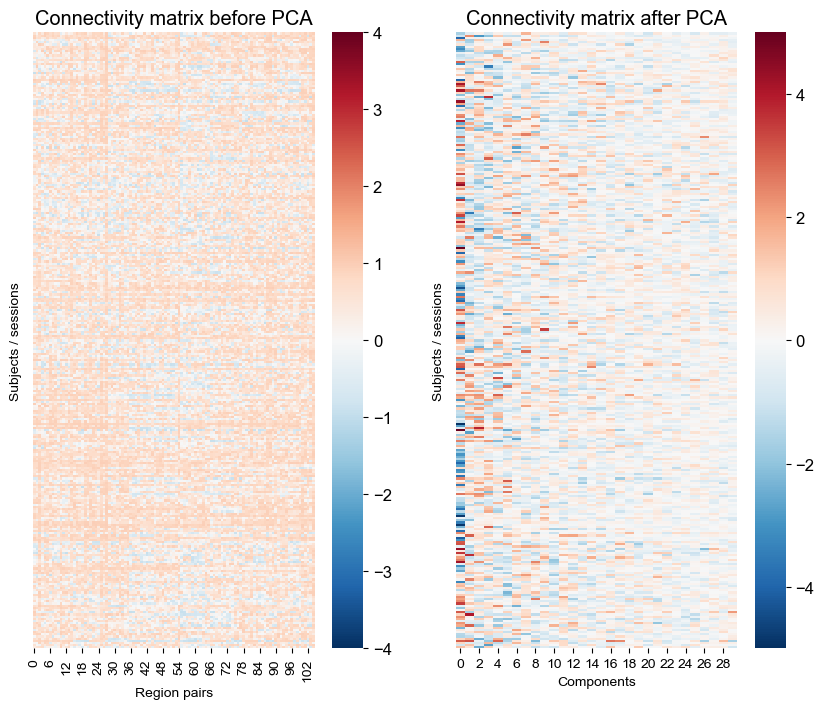

In [93]:
from sklearn.preprocessing import StandardScaler, scale
import seaborn as sns

# No standardisation
connectMatrix_pca = pca.fit_transform(X=X) 

fig, axs= plt.subplots(1,2,figsize=(10,8))
plt.rcParams['font.sans-serif'] = 'Arial';
plt.rcParams['font.family'] = 'sans-serif';
plt.rcParams['font.size']=12;

sns.heatmap(X, vmin=-4, vmax=4, cmap='RdBu_r', ax=axs[0], cbar=True, yticklabels=False)
axs[0].set_ylabel('Subjects / sessions');
axs[0].set_xlabel('Region pairs');
axs[0].set_title('Connectivity matrix before PCA');
sns.heatmap(connectMatrix_pca, vmin=-5, vmax=5, cmap='RdBu_r', ax=axs[1], cbar=True, yticklabels=False)
axs[1].set_ylabel('Subjects / sessions');
axs[1].set_xlabel('Components');
axs[1].set_title('Connectivity matrix after PCA');

In [94]:
# An array of the components and their weights
components = pca.components_.T

# Number of components
len(pca.components_)

30

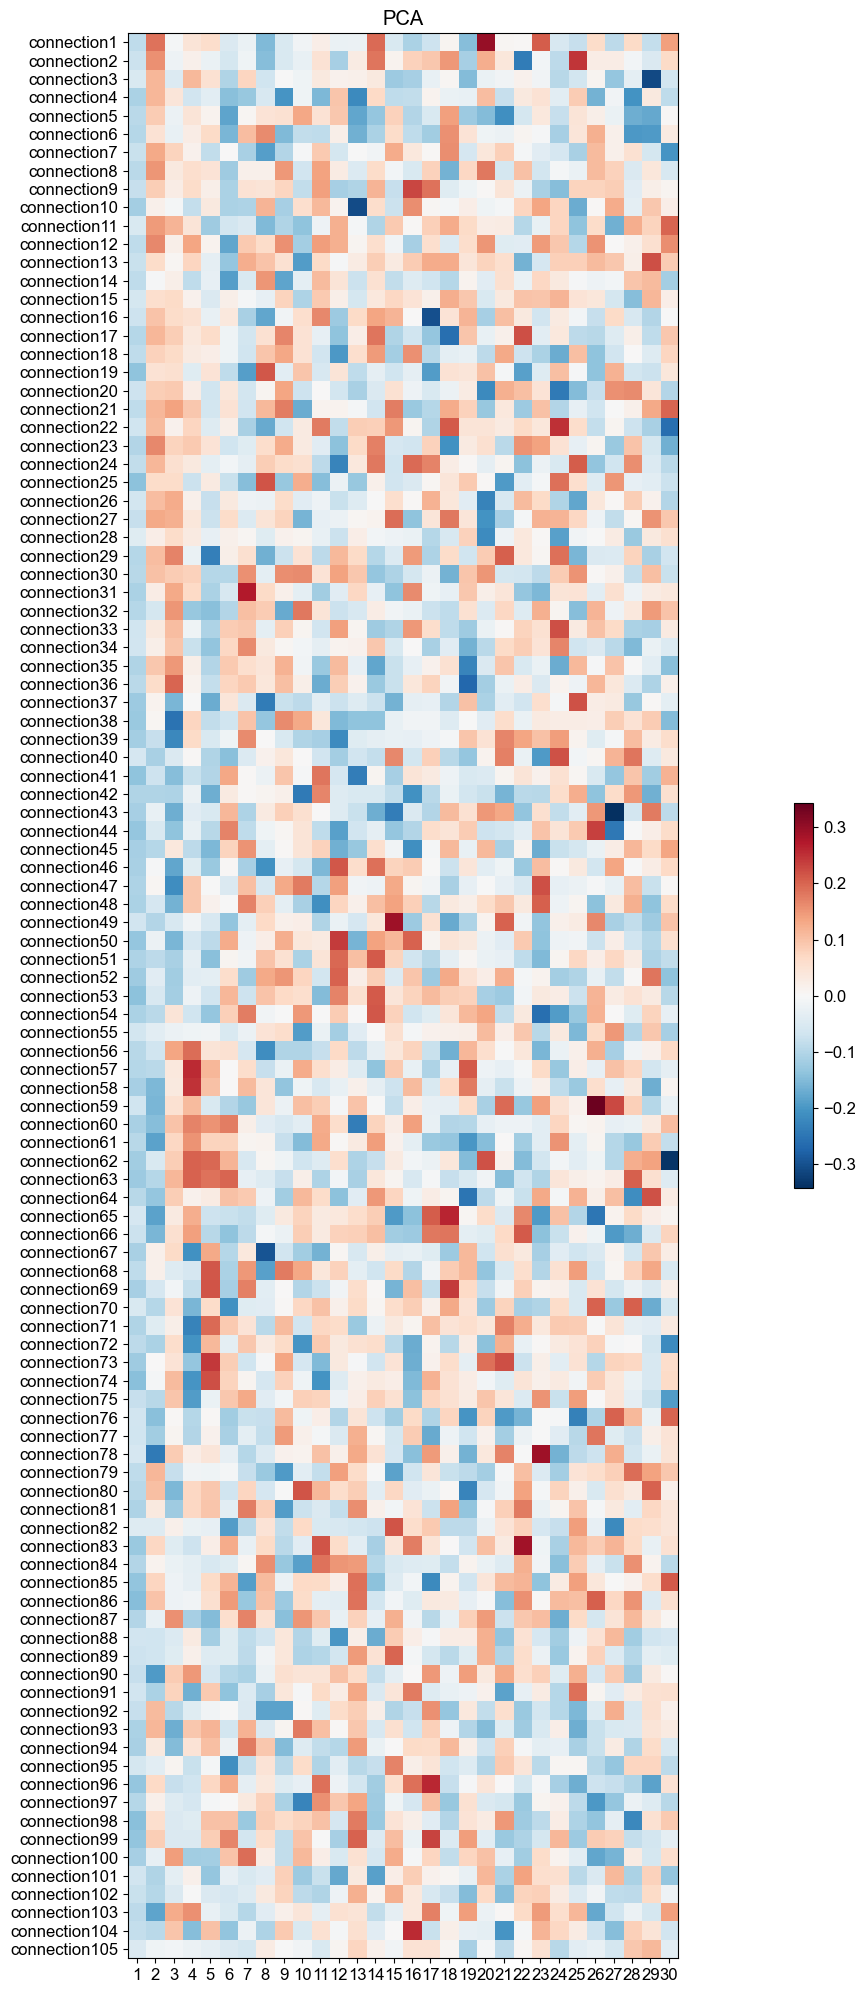

In [95]:
# Finding the coefficient strenghts between components and connectivity (weights)

plt.figure(figsize=(30, 25))
ax = plt.axes()
ax.set_title("PCA")


ticks = np.shape(components)[1]
vmax = np.abs(components).max()
im=ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)

ax.set_yticks(np.arange(len(df_conn.columns)))
ax.set_yticklabels(df_conn.columns)
plt.colorbar(im, ax=ax, shrink = 0.2,  orientation='vertical')

ax.set_xticks(range(ticks))
ax.set_xticklabels(range(1,ticks+1))

plt.show()

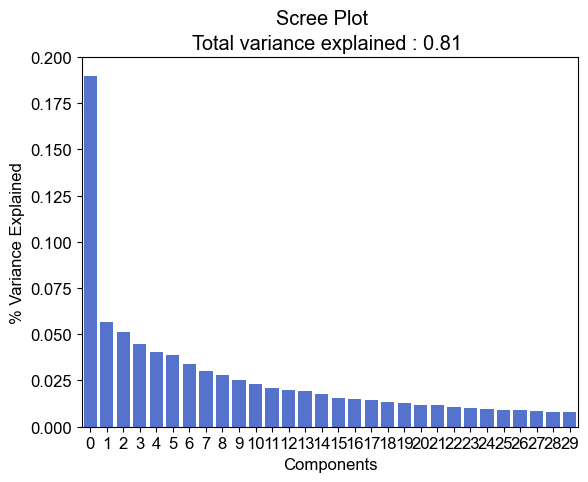

In [96]:
# % of explained variance per component

xaxis = list(range(len(pca.explained_variance_ratio_)))

plt.suptitle('Scree Plot') 
plt.title('Total variance explained : %.2f ' %pca.explained_variance_ratio_.sum())

p = sns.barplot(x = xaxis, y= pca.explained_variance_ratio_, color = 'royalblue')
p.set_xlabel("Components")
p.set_ylabel("% Variance Explained")
plt.ylim(0, 0.2)
plt.show()

<a name="export"/>


## Exporting PCA data

In [97]:
# Making column names
col_names = []
for f in range(len(pd.DataFrame(connectMatrix_pca.T))):
    f2=f+1
    col_names.append(f'component_{f2}')

In [98]:
# Table of pca values for each connection
df_pca = pd.DataFrame(connectMatrix_pca, columns = col_names)
df_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_21,component_22,component_23,component_24,component_25,component_26,component_27,component_28,component_29,component_30
0,-1.643245,-0.568119,0.262691,-0.725606,0.260661,-0.345503,0.293987,1.693099,0.425232,0.363545,...,-1.006493,0.607133,0.028671,-0.534179,-0.188153,-0.831429,0.238106,-0.534079,-0.521237,-0.324440
1,-0.992562,2.324792,-2.920408,-1.999940,1.324610,-1.172013,-1.233097,-0.148055,0.809528,-0.965690,...,-0.661883,-0.255518,0.071678,0.349175,-0.011980,0.223210,0.086427,-0.116946,0.313472,0.019636
2,-3.907255,0.226717,-0.297888,-0.025566,0.014959,0.215311,0.125585,0.167877,0.336537,-0.015754,...,0.239105,-0.229709,0.272868,-0.159019,-0.137015,0.275300,0.052180,0.146154,0.071931,-0.185040
3,1.670423,-1.748862,1.368304,-1.140518,-0.350557,0.717930,-0.105644,2.162844,-0.403222,-0.840398,...,-0.488409,-0.599921,-0.270743,-0.372796,0.063425,-0.279746,-0.301077,0.213354,-0.618578,-0.432154
4,-0.741300,-1.622654,0.378424,-0.564686,0.069251,1.007914,-0.903969,-0.235896,0.791804,2.537655,...,0.006056,-0.345028,-0.515288,-0.440808,0.174726,0.309385,0.333709,-0.115662,0.465963,-0.534145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,1.047326,1.599232,-2.447978,-1.083265,1.813741,-1.764582,-1.835599,0.075316,0.905744,-1.023990,...,-0.330096,0.213260,-0.090958,-0.567650,-0.339764,-0.392453,0.147451,-0.440395,0.170233,0.526709
277,2.980399,3.169046,-0.347747,-1.887919,2.889920,-1.548543,0.594638,0.333949,-2.163711,-0.104238,...,-1.133414,0.730456,-0.946173,-0.108733,0.025724,0.680611,-1.631891,0.147373,1.533600,-1.668812
278,1.090446,-0.684311,-0.814858,1.640545,-1.341930,-0.807702,1.674517,0.669885,-1.081263,0.094039,...,-0.061043,0.548183,-0.794274,-0.117501,0.043745,-0.014866,0.536271,0.221151,0.465062,0.278172
279,-1.007724,1.389942,-0.566745,-2.743447,-0.659043,0.822217,-0.252911,-0.693674,0.572283,0.377550,...,-0.908610,0.320890,0.057234,-0.163618,-0.827415,0.762327,0.055180,0.089103,-0.120332,-0.141007


In [99]:
# Selecting additionnal information from the day2day dataframe to add in the PCA results csv
df_panas = df_day2day[['PANAS_PA', 'PANAS_NA']]
df_info = df_day2day[['subject', 'session_count', 'session_num', 'daysFromFirstScan']]

In [100]:
# Combining session information, pca values, and PANAS scales
complete_df_pca = pd.concat([df_info, df_pca, df_panas], axis=1)
complete_df_pca

,subject,session_count,session_num,daysFromFirstScan,component_1,component_2,component_3,component_4,component_5,component_6,...,component_23,component_24,component_25,component_26,component_27,component_28,component_29,component_30,PANAS_PA,PANAS_NA
0,1,1,1,0,-1.643245,-0.568119,0.262691,-0.725606,0.260661,-0.345503,...,0.028671,-0.534179,-0.188153,-0.831429,0.238106,-0.534079,-0.521237,-0.324440,24,12
1,1,2,2,2,-0.992562,2.324792,-2.920408,-1.999940,1.324610,-1.172013,...,0.071678,0.349175,-0.011980,0.223210,0.086427,-0.116946,0.313472,0.019636,23,16
2,1,3,3,7,-3.907255,0.226717,-0.297888,-0.025566,0.014959,0.215311,...,0.272868,-0.159019,-0.137015,0.275300,0.052180,0.146154,0.071931,-0.185040,20,17
3,1,4,4,9,1.670423,-1.748862,1.368304,-1.140518,-0.350557,0.717930,...,-0.270743,-0.372796,0.063425,-0.279746,-0.301077,0.213354,-0.618578,-0.432154,27,16
4,1,5,5,14,-0.741300,-1.622654,0.378424,-0.564686,0.069251,1.007914,...,-0.515288,-0.440808,0.174726,0.309385,0.333709,-0.115662,0.465963,-0.534145,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,8,45,46,220,1.047326,1.599232,-2.447978,-1.083265,1.813741,-1.764582,...,-0.090958,-0.567650,-0.339764,-0.392453,0.147451,-0.440395,0.170233,0.526709,30,11
277,8,46,47,222,2.980399,3.169046,-0.347747,-1.887919,2.889920,-1.548543,...,-0.946173,-0.108733,0.025724,0.680611,-1.631891,0.147373,1.533600,-1.668812,23,12
278,8,47,48,224,1.090446,-0.684311,-0.814858,1.640545,-1.341930,-0.807702,...,-0.794274,-0.117501,0.043745,-0.014866,0.536271,0.221151,0.465062,0.278172,22,25
279,8,48,49,226,-1.007724,1.389942,-0.566745,-2.743447,-0.659043,0.822217,...,0.057234,-0.163618,-0.827415,0.762327,0.055180,0.089103,-0.120332,-0.141007,28,14


In [101]:
# Exporting PCA results
complete_df_pca.to_csv( "output_data/pca_80_day2day.csv", index=False, encoding='utf-8-sig')

## Exporting weights with regions names associated with each connection

In [102]:
pd.DataFrame(components, columns = col_names)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_21,component_22,component_23,component_24,component_25,component_26,component_27,component_28,component_29,component_30
0,-0.088103,0.185872,-0.007758,0.044504,0.060096,-0.049499,-0.022784,-0.149852,-0.051887,-0.013286,...,0.005833,0.002831,0.206408,-0.054084,-0.080029,0.061767,-0.089966,0.065537,-0.080490,0.141267
1,-0.074077,0.156486,-0.017828,0.016282,-0.023090,-0.059427,-0.015980,-0.146789,-0.053106,-0.024402,...,0.038415,-0.240238,-0.008459,-0.089268,0.243935,0.026235,0.025959,-0.008632,-0.050806,0.065964
2,-0.052828,0.114512,-0.047268,0.111944,0.052634,-0.103651,0.073972,-0.069357,-0.000644,-0.016037,...,-0.011539,0.015629,-0.012969,-0.094923,-0.063253,0.010657,-0.131154,-0.032756,-0.309188,-0.062167
3,-0.108261,0.114177,0.040611,-0.065965,-0.035570,-0.143721,-0.130985,-0.055756,-0.201239,-0.015868,...,-0.079505,0.032199,0.049580,-0.036469,0.086871,-0.162527,-0.012209,-0.204184,0.034460,-0.088255
4,-0.092700,0.085961,-0.020291,0.044739,0.011455,-0.180169,0.005596,0.047499,0.051404,0.131873,...,-0.210420,-0.061104,0.035580,-0.079298,0.045340,0.020812,-0.022965,-0.166331,-0.175417,0.004916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-0.066122,-0.102586,-0.033789,0.018075,-0.131844,-0.026918,-0.053415,-0.038011,0.080432,-0.123342,...,-0.109333,0.137134,0.056453,0.055049,-0.092207,-0.049906,0.112028,-0.108388,0.078795,-0.132897
101,-0.076607,-0.096333,-0.050713,-0.001785,-0.050303,-0.056797,-0.044416,0.033400,0.076910,-0.089495,...,-0.146593,0.076286,0.080902,0.026958,-0.046989,-0.013315,-0.087914,-0.090574,0.066573,-0.017652
102,-0.090070,-0.181333,0.127361,0.156556,-0.024697,-0.051695,-0.097715,-0.039823,0.016239,0.040445,...,0.002749,0.065661,0.146503,0.058773,0.113319,-0.174370,-0.067484,-0.021258,-0.059741,0.139591
103,-0.080721,-0.091572,0.094575,-0.146849,0.100479,-0.136322,-0.020916,-0.104391,0.090612,-0.053223,...,-0.201706,-0.006253,0.115351,0.071879,0.027060,-0.071510,-0.145267,0.080856,0.042880,-0.066314


### Matrix of connections

Creating a template to associate connection number and associated regions

In [103]:
# First, obtain only info for the 15 regions
top15_names = pd.read_csv("output_data/brainnetome_15_regions_names.csv")

In [104]:
# Making an empty dataframes where the lower triangle is zeroes and the rest is NaN
regions = top15_names['region_name']
empty = pd.DataFrame(columns = regions, index = regions)
lowert = np.triu(empty, k=0)
flat = lowert.flatten()

In [105]:
# adapted from : https://blog.finxter.com/how-to-replace-a-list-element-at-a-specific-index-in-python/indices = np.where(flat == 0)[0] # Indicates where the zeroes are in the array

indices = np.where(flat == 0)[0] # Indicates where the zeroes are in the array
repl = range(0, 276) # Replacement values (the connection number)

for i in range(len(indices)):
    flat[indices[i]] = repl[i]

In [106]:
pd.set_option('display.max_columns', None)
size = len(regions)

conn_matrix = pd.DataFrame(np.reshape(flat, (size, size)), columns = regions, index = regions)
conn_matrix

region_name,R-A10m,L-A11l,R-A13,L-A38m,R-A22c,L-A22r,L-vId/vIg,R-vId/vIg,R-V5/MT+,L-mAmyg,R-mAmyg,L-lAmyg,R-lAmyg,L-rHipp,R-rHipp
region_name,,,,,,,,,,,,,,,
R-A10m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L-A11l,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-A13,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L-A38m,3,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-A22c,6,7,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L-A22r,10,11,12,13,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L-vId/vIg,15,16,17,18,19,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-vId/vIg,21,22,23,24,25,26,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-V5/MT+,28,29,30,31,32,33,34,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Converting region-region to indexes
reg_reg_name = conn_matrix.stack().astype(int)
reg_reg_name.index.rename(['region_1', 'region_2'], inplace=True)
reg_reg_name

region_1  region_2
L-A11l    R-A10m        0
R-A13     R-A10m        1
          L-A11l        2
L-A38m    R-A10m        3
          L-A11l        4
                     ... 
R-rHipp   L-mAmyg     100
          R-mAmyg     101
          L-lAmyg     102
          R-lAmyg     103
          L-rHipp     104
Length: 105, dtype: int32

In [108]:
reg_reg_name_df = pd.DataFrame(reg_reg_name).reset_index()

In [109]:
connection_name= reg_reg_name_df['region_1']+' - '+reg_reg_name_df['region_2']
connection_name.rename('conn_name')

0        L-A11l - R-A10m
1         R-A13 - R-A10m
2         R-A13 - L-A11l
3        L-A38m - R-A10m
4        L-A38m - L-A11l
             ...        
100    R-rHipp - L-mAmyg
101    R-rHipp - R-mAmyg
102    R-rHipp - L-lAmyg
103    R-rHipp - R-lAmyg
104    R-rHipp - L-rHipp
Name: conn_name, Length: 105, dtype: object

In [110]:
# Making column names
col_names = []
for f in range(len(pd.DataFrame(connectMatrix_pca.T))):
    f2=f+1
    col_names.append(f'component_{f2}')

# Making a dataframe of components' weights
component_weights = pd.DataFrame(components, columns = col_names)

# Adding the names of the regions for each connection
component_weights.insert(0, column='connection_name', value =  connection_name)
component_weights

,connection_name,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,component_21,component_22,component_23,component_24,component_25,component_26,component_27,component_28,component_29,component_30
0,L-A11l - R-A10m,-0.088103,0.185872,-0.007758,0.044504,0.060096,-0.049499,-0.022784,-0.149852,-0.051887,-0.013286,0.022868,-0.022721,-0.020137,0.192972,-0.051057,-0.108266,-0.072166,0.010698,-0.145790,0.297828,0.005833,0.002831,0.206408,-0.054084,-0.080029,0.061767,-0.089966,0.065537,-0.080490,0.141267
1,R-A13 - R-A10m,-0.074077,0.156486,-0.017828,0.016282,-0.023090,-0.059427,-0.015980,-0.146789,-0.053106,-0.024402,0.048803,-0.113140,0.026915,0.183807,0.012107,0.078387,0.091034,0.148653,-0.114893,0.123291,0.038415,-0.240238,-0.008459,-0.089268,0.243935,0.026235,0.025959,-0.008632,-0.050806,0.065964
2,R-A13 - L-A11l,-0.052828,0.114512,-0.047268,0.111944,0.052634,-0.103651,0.073972,-0.069357,-0.000644,-0.016037,0.034466,0.015974,0.018138,0.034625,-0.124409,-0.114400,-0.025571,0.007302,-0.149077,-0.023048,-0.011539,0.015629,-0.012969,-0.094923,-0.063253,0.010657,-0.131154,-0.032756,-0.309188,-0.062167
3,L-A38m - R-A10m,-0.108261,0.114177,0.040611,-0.065965,-0.035570,-0.143721,-0.130985,-0.055756,-0.201239,-0.015868,-0.154022,0.094446,-0.219104,0.067061,-0.087615,-0.083215,0.012380,-0.023907,-0.026271,0.104390,-0.079505,0.032199,0.049580,-0.036469,0.086871,-0.162527,-0.012209,-0.204184,0.034460,-0.088255
4,L-A38m - L-A11l,-0.092700,0.085961,-0.020291,0.044739,0.011455,-0.180169,0.005596,0.047499,0.051404,0.131873,0.049576,0.091143,-0.176933,-0.131927,0.079895,-0.099979,-0.053490,0.140026,-0.123708,-0.148220,-0.210420,-0.061104,0.035580,-0.079298,0.045340,0.020812,-0.022965,-0.166331,-0.175417,0.004916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,R-rHipp - L-mAmyg,-0.066122,-0.102586,-0.033789,0.018075,-0.131844,-0.026918,-0.053415,-0.038011,0.080432,-0.123342,-0.075974,-0.174689,0.034625,-0.185438,0.021460,0.084729,0.013605,0.006856,-0.024125,0.113896,-0.109333,0.137134,0.056453,0.055049,-0.092207,-0.049906,0.112028,-0.108388,0.078795,-0.132897
101,R-rHipp - R-mAmyg,-0.076607,-0.096333,-0.050713,-0.001785,-0.050303,-0.056797,-0.044416,0.033400,0.076910,-0.089495,-0.103531,-0.018168,0.122305,0.012830,0.121721,0.035794,-0.055984,-0.079024,-0.147650,0.069260,-0.146593,0.076286,0.080902,0.026958,-0.046989,-0.013315,-0.087914,-0.090574,0.066573,-0.017652
102,R-rHipp - L-lAmyg,-0.090070,-0.181333,0.127361,0.156556,-0.024697,-0.051695,-0.097715,-0.039823,0.016239,0.040445,-0.031398,0.050875,0.045414,-0.084654,-0.029701,0.036477,0.173367,-0.013613,0.141893,-0.021059,0.002749,0.065661,0.146503,0.058773,0.113319,-0.174370,-0.067484,-0.021258,-0.059741,0.139591
103,R-rHipp - R-lAmyg,-0.080721,-0.091572,0.094575,-0.146849,0.100479,-0.136322,-0.020916,-0.104391,0.090612,-0.053223,0.050911,-0.007495,0.055092,-0.040105,0.000204,0.256564,-0.077428,0.019111,-0.027684,-0.033401,-0.201706,-0.006253,0.115351,0.071879,0.027060,-0.071510,-0.145267,0.080856,0.042880,-0.066314


In [111]:
# Exporting weights
component_weights.to_csv( "output_data/weights_pca_80_day2day.csv", index=False, encoding='utf-8-sig')

In [112]:
component_weights['connection_name'][::-1]

104    R-rHipp - L-rHipp
103    R-rHipp - R-lAmyg
102    R-rHipp - L-lAmyg
101    R-rHipp - R-mAmyg
100    R-rHipp - L-mAmyg
             ...        
4        L-A38m - L-A11l
3        L-A38m - R-A10m
2         R-A13 - L-A11l
1         R-A13 - R-A10m
0        L-A11l - R-A10m
Name: connection_name, Length: 105, dtype: object

In [113]:
# Exporting connection names for later use in univariate models
# Order is reversed to fit table in the analysis file (Univariate.Rmd)
component_weights['connection_name'][::-1].to_csv( "output_data/105_connection_names_reversed.csv", index=False, encoding='utf-8-sig')

<hr>

<a name="post"/>

# Post-analysis

This section is meant to be run after the linear regression analysis

## Table of contents:
* [Setting up](#set-post)
* [Individual heatmaps for retained components](#indiv) 
* [Mean weights for PA and NA](#abs)

<a name="set-post"/>

## Setting up

In [114]:
import pandas as pd
import numpy as np
import nilearn
from nilearn import plotting
from nilearn import masking
from nilearn import image
import matplotlib.pyplot as plt

In [115]:
# Importing datat from components' weights for each connection
weights_df = pd.read_csv("output_data/weights_pca_80_day2day.csv") 

weights_df

,connection_name,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,component_21,component_22,component_23,component_24,component_25,component_26,component_27,component_28,component_29,component_30
0,L-A11l - R-A10m,-0.088103,0.185872,-0.007758,0.044504,0.060096,-0.049499,-0.022784,-0.149852,-0.051887,-0.013286,0.022868,-0.022721,-0.020137,0.192972,-0.051057,-0.108266,-0.072166,0.010698,-0.145790,0.297828,0.005833,0.002831,0.206408,-0.054084,-0.080029,0.061767,-0.089966,0.065537,-0.080490,0.141267
1,R-A13 - R-A10m,-0.074077,0.156486,-0.017828,0.016282,-0.023090,-0.059427,-0.015980,-0.146789,-0.053106,-0.024402,0.048803,-0.113140,0.026915,0.183807,0.012107,0.078387,0.091034,0.148653,-0.114893,0.123291,0.038415,-0.240238,-0.008459,-0.089268,0.243935,0.026235,0.025959,-0.008632,-0.050806,0.065964
2,R-A13 - L-A11l,-0.052828,0.114512,-0.047268,0.111944,0.052634,-0.103651,0.073972,-0.069357,-0.000644,-0.016037,0.034466,0.015974,0.018138,0.034625,-0.124409,-0.114400,-0.025571,0.007302,-0.149077,-0.023048,-0.011539,0.015629,-0.012969,-0.094923,-0.063253,0.010657,-0.131154,-0.032756,-0.309188,-0.062167
3,L-A38m - R-A10m,-0.108261,0.114177,0.040611,-0.065965,-0.035570,-0.143721,-0.130985,-0.055756,-0.201239,-0.015868,-0.154022,0.094446,-0.219104,0.067061,-0.087615,-0.083215,0.012380,-0.023907,-0.026271,0.104390,-0.079505,0.032199,0.049580,-0.036469,0.086871,-0.162527,-0.012209,-0.204184,0.034460,-0.088255
4,L-A38m - L-A11l,-0.092700,0.085961,-0.020291,0.044739,0.011455,-0.180169,0.005596,0.047499,0.051404,0.131873,0.049576,0.091143,-0.176933,-0.131927,0.079895,-0.099979,-0.053490,0.140026,-0.123708,-0.148220,-0.210420,-0.061104,0.035580,-0.079298,0.045340,0.020812,-0.022965,-0.166331,-0.175417,0.004916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,R-rHipp - L-mAmyg,-0.066122,-0.102586,-0.033789,0.018075,-0.131844,-0.026918,-0.053415,-0.038011,0.080432,-0.123342,-0.075974,-0.174689,0.034625,-0.185438,0.021460,0.084729,0.013605,0.006856,-0.024125,0.113896,-0.109333,0.137134,0.056453,0.055049,-0.092207,-0.049906,0.112028,-0.108388,0.078795,-0.132897
101,R-rHipp - R-mAmyg,-0.076607,-0.096333,-0.050713,-0.001785,-0.050303,-0.056797,-0.044416,0.033400,0.076910,-0.089495,-0.103531,-0.018168,0.122305,0.012830,0.121721,0.035794,-0.055984,-0.079024,-0.147650,0.069260,-0.146593,0.076286,0.080902,0.026958,-0.046989,-0.013315,-0.087914,-0.090574,0.066573,-0.017652
102,R-rHipp - L-lAmyg,-0.090070,-0.181333,0.127361,0.156556,-0.024697,-0.051695,-0.097715,-0.039823,0.016239,0.040445,-0.031398,0.050875,0.045414,-0.084654,-0.029701,0.036477,0.173367,-0.013613,0.141893,-0.021059,0.002749,0.065661,0.146503,0.058773,0.113319,-0.174370,-0.067484,-0.021258,-0.059741,0.139591
103,R-rHipp - R-lAmyg,-0.080721,-0.091572,0.094575,-0.146849,0.100479,-0.136322,-0.020916,-0.104391,0.090612,-0.053223,0.050911,-0.007495,0.055092,-0.040105,0.000204,0.256564,-0.077428,0.019111,-0.027684,-0.033401,-0.201706,-0.006253,0.115351,0.071879,0.027060,-0.071510,-0.145267,0.080856,0.042880,-0.066314


<a name="indiv"/>

## Individual heatmaps for components retained by our analysis models

In [117]:
# A list of all components retained by our parsimonious LASSO models

retained_comp = [1,4,6,7,15,17,22,25,27,30]

comp_list = []
for x in retained_comp:
    temp = nilearn.connectome.vec_to_sym_matrix(weights_df[f"component_{x}"], diagonal = np.full((15), 1))
    comp_list.append(temp)

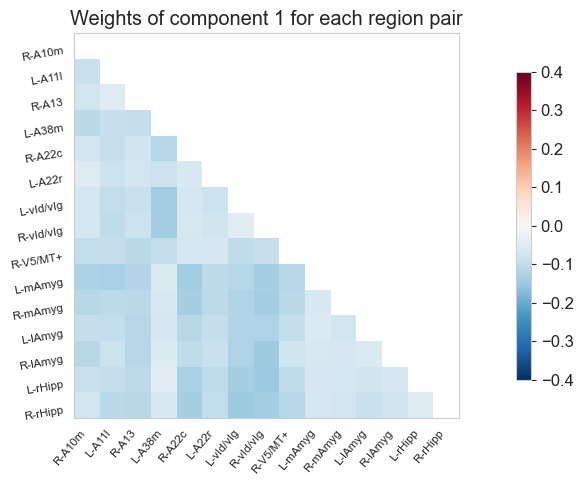

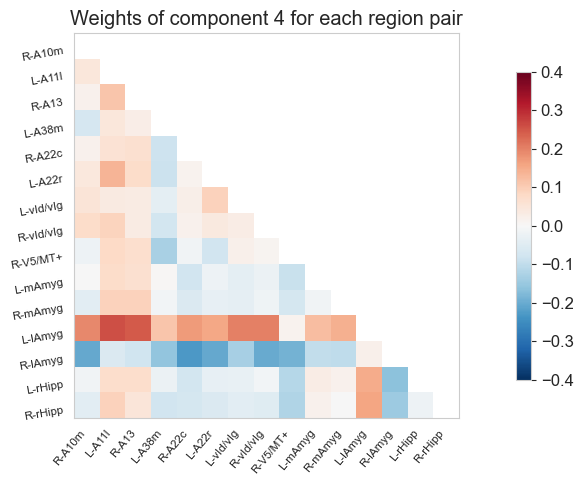

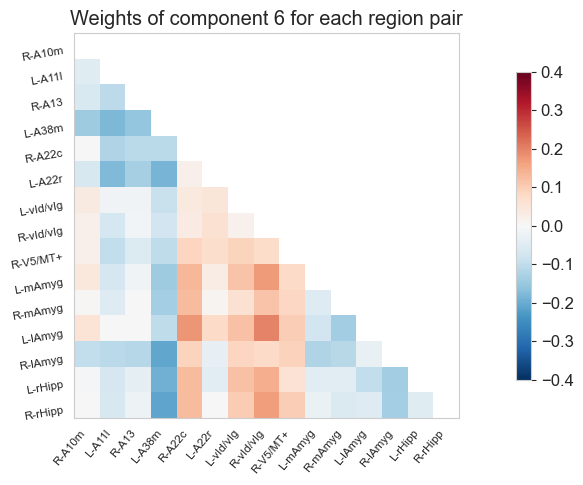

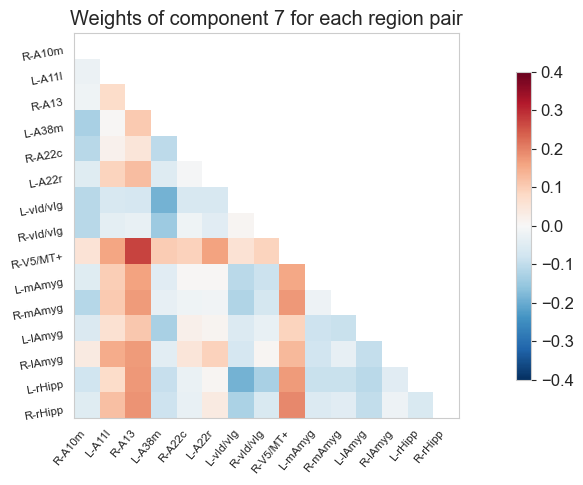

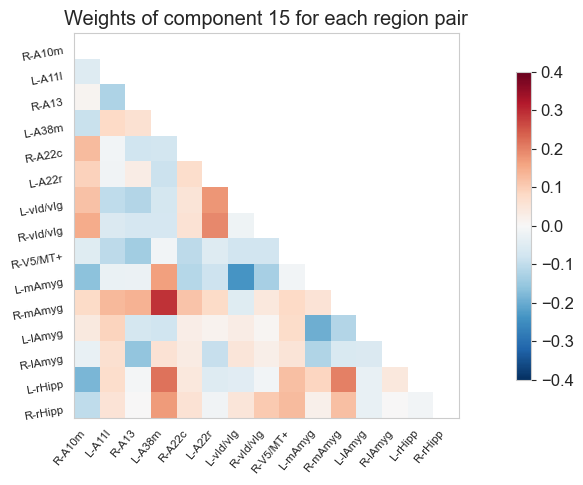

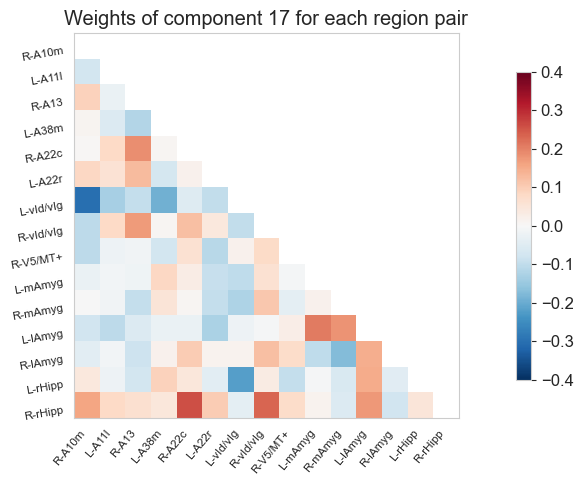

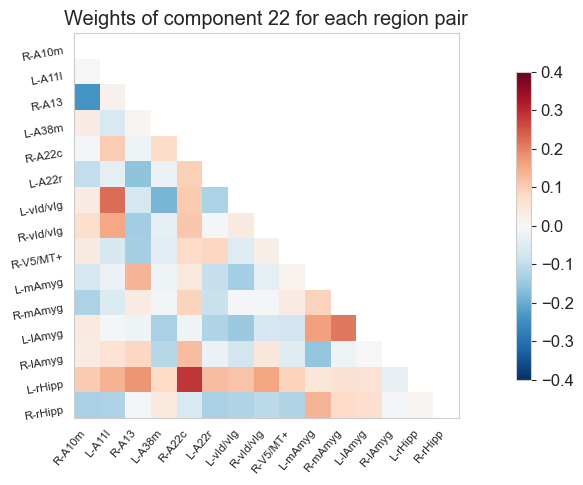

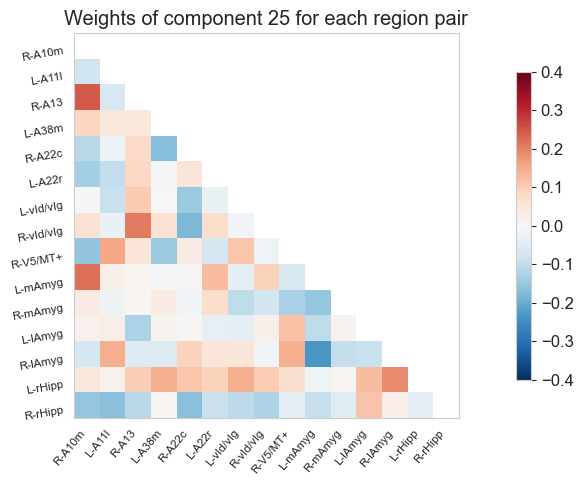

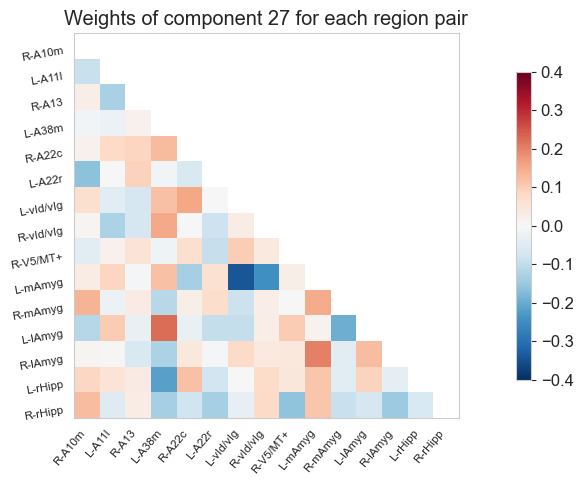

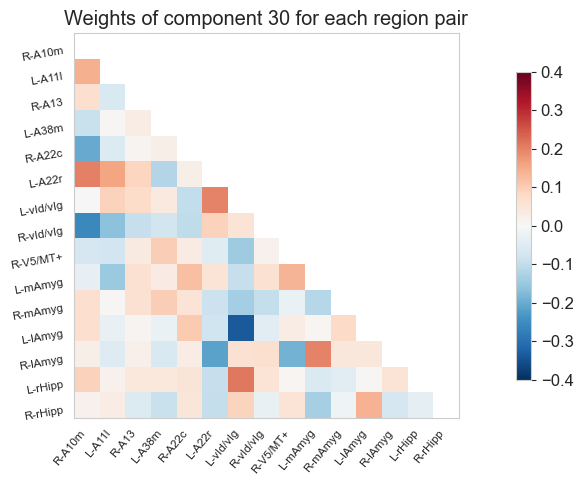

In [123]:
# Heatmaps of weight by region (lower triangle only) of every component retained by LASSO models

# Fetching the 15 regions' names and formatting to fit figure
regions = pd.read_csv("output_data/brainnetome_15_regions_names.csv")
rtics = regions['region_name'].tolist()

for x, i in zip(comp_list, retained_comp):
    sns.set_style("whitegrid", {'axes.grid' : False})
    nilearn.plotting.plot_matrix(x, tri='lower', cmap="RdBu_r",vmax = 0.4, vmin=-0.4,
                                 labels=rtics)
    
    plt.title(f"Weights of component {i} for each region pair")    

    plt.savefig(f"output_figures/component_{i}_heatmap.svg", bbox_inches='tight')
    nilearn.plotting.show()

<a name="abs"/>

## Combined heatmap representing combined predictors of a mood scale

In [119]:
# Keeping retained components for each scale
lasso_PA = weights_df[["component_1","component_4", "component_7", "component_15", "component_17", "component_22", "component_25", "component_30"]]
lasso_NA = weights_df[["component_6", "component_15", "component_17", "component_27"]]

# Calculating the mean of their absolute value
mean_lasso_PA = abs(lasso_PA).mean(axis=1)
mean_lasso_NA = abs(lasso_NA).mean(axis=1)

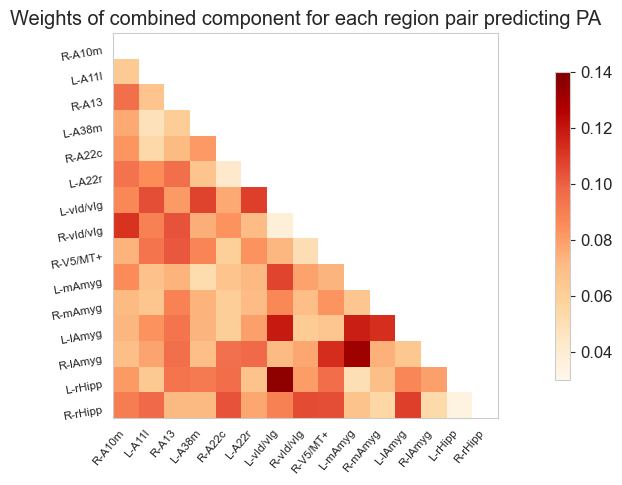

In [120]:
# Heatmaps of weight by regions (lower triangle only)
# Every component retained by lasso regions aggregated together

mean_PA_trig = nilearn.connectome.vec_to_sym_matrix(mean_lasso_PA, diagonal = np.full((15), 1))

sns.set_style("whitegrid", {'axes.grid' : False})
nilearn.plotting.plot_matrix(mean_PA_trig, tri='lower', cmap="OrRd",vmax = 0.14, vmin=0.03,
                                 labels=rtics)
    
plt.title("Weights of combined component for each region pair predicting PA")    

plt.savefig("output_figures/mean_abs_PA_model.svg", bbox_inches='tight')
nilearn.plotting.show()

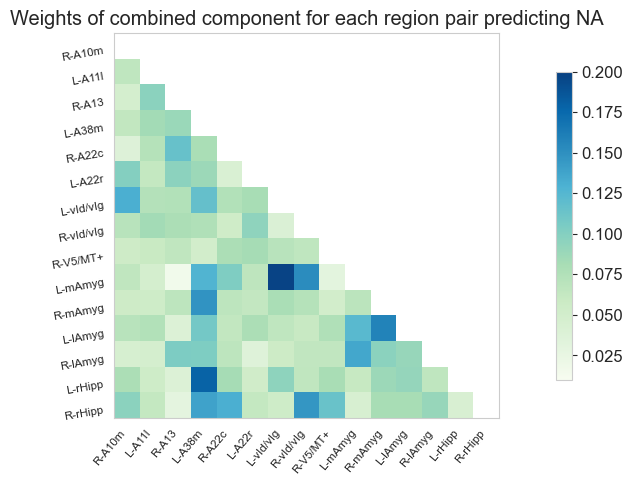

In [121]:
# Heatmaps of weight by regions (lower triangle only)
# Every component retained by lasso regions aggregated together

mean_NA_trig = nilearn.connectome.vec_to_sym_matrix(mean_lasso_NA, diagonal = np.full((15), 1))

sns.set_style("whitegrid", {'axes.grid' : False})
nilearn.plotting.plot_matrix(mean_NA_trig, tri='lower', cmap="GnBu",vmax = 0.2, vmin=0.01,
                                 labels=rtics)
    
plt.title("Weights of combined component for each region pair predicting NA")    

plt.savefig("output_figures/mean_abs_NA_model.svg", bbox_inches='tight')
nilearn.plotting.show()